# Examples of the Gaussian FFT prior (1)

Using +/- sampling but not amplitude sampling. What that means:

The Gaussian prior is a 2-D power spectrum P. A point i,j specifies the mode i,j. The value of P\[i, j\] is the variance of both the real and imag components of a 2-D FFT at mode i, j. There are two ways that this can be sampled, and one of them is purely used for testing (the second one).
- Assume that the variance is the variance of a Gaussian distribution and sample that distribution. The value of the sample could be anything. Example: if the variance is 5, then samples are taken from a Gaussian distribution with mean 0 and variance 5.
- Restrict all samples to be +variance or -variance, with equal probability. This is used for testing, and it is a handy way of constraining the sampling so that particular modes or combinations of modes can be examined, keeping the relative amplitudes of the modes as specified by the prior. Example: if the variance is 5, then all samples are either 5 or -5.

This section uses the second method, the one for testing.

Warning: the smoothness will be most evident when there are a large number of times and frequencies. For small numbers of times/freqs, things can get "spikey". These examples use 64 times and frequencies. The narrowness of the peak of the Gaussian prior is also a factpr. If the peak is narrow then high modes are almost non-existent so the smoothness improves.


In [1]:
from s_manager import SManager      # The prior is called S in the Gibbs sampling
import matplotlib.pyplot as plt
import numpy as np
from calcs import unflatten_complex_2d
import yaml


In [2]:
DIM = 64

def many_samples(N, modes, num_rows, num_cols, fix_amplitude):

    plt.figure(figsize=(num_cols*6, num_rows*6))
    sm = SManager(N, N, 4)

    flat = lambda x, y: 1
    gauss = lambda x, y: np.exp(-0.5*(x**2+y**2)/.005)
    S = sm.generate_S(gauss, modes=modes, zoom_from=(64, 64))

    k = 1
    print("      Mean\t Sigma")
    print("      ----\t -----")
    mean_avg = 0.0
    sigma_avg = 0.0
    for i in range(num_rows):
        for j in range(num_cols):
            plt.subplot(num_rows, num_cols, k)

            x_flat = sm.sample("x", exact=fix_amplitude)
            x = unflatten_complex_2d(x_flat, (N, N))
            print("     ", round(np.mean(x_flat), 4), "\t", round(np.std(x_flat), 4))
            mean_avg += np.mean(x_flat)
            sigma_avg += np.std(x_flat)
            
            #  Randomly select what to show
            if np.random.randint(0, 2) == 0:
                #print("imag")
                plt.plot(x.imag[np.random.randint(0, N)]) 
            else:
                #print("real")
                plt.plot(x.real[np.random.randint(0, N)]) 
                
            k += 1
            
    print("      ----\t  -----")
    print("Avg: ", round(mean_avg/(k-1), 4), "\t", round(sigma_avg/(k-1), 4))
    print()

## Only lowest mode 

modes = 1

28 modes selected out of 28672 (0.0%) (zero-valued modes are also ignored)
      Mean	 Sigma
      ----	 -----
      0.0 	 0.0257
      0.0 	 0.0257
      0.0 	 0.0257
      0.0 	 0.0257
      0.0 	 0.0257
      0.0 	 0.0257
      0.0 	 0.0257
      0.0 	 0.0257
      0.0 	 0.0257
      0.0 	 0.0257
      0.0 	 0.0257
      0.0 	 0.0257
      0.0 	 0.0257
      0.0 	 0.0257
      0.0 	 0.0257
      0.0 	 0.0257
      0.0 	 0.0257
      0.0 	 0.0257
      0.0 	 0.0257
      0.0 	 0.0257
      0.0 	 0.0257
      0.0 	 0.0257
      0.0 	 0.0257
      0.0 	 0.0257
      0.0 	 0.0257
      ----	  -----
Avg:  0.0 	 0.0257



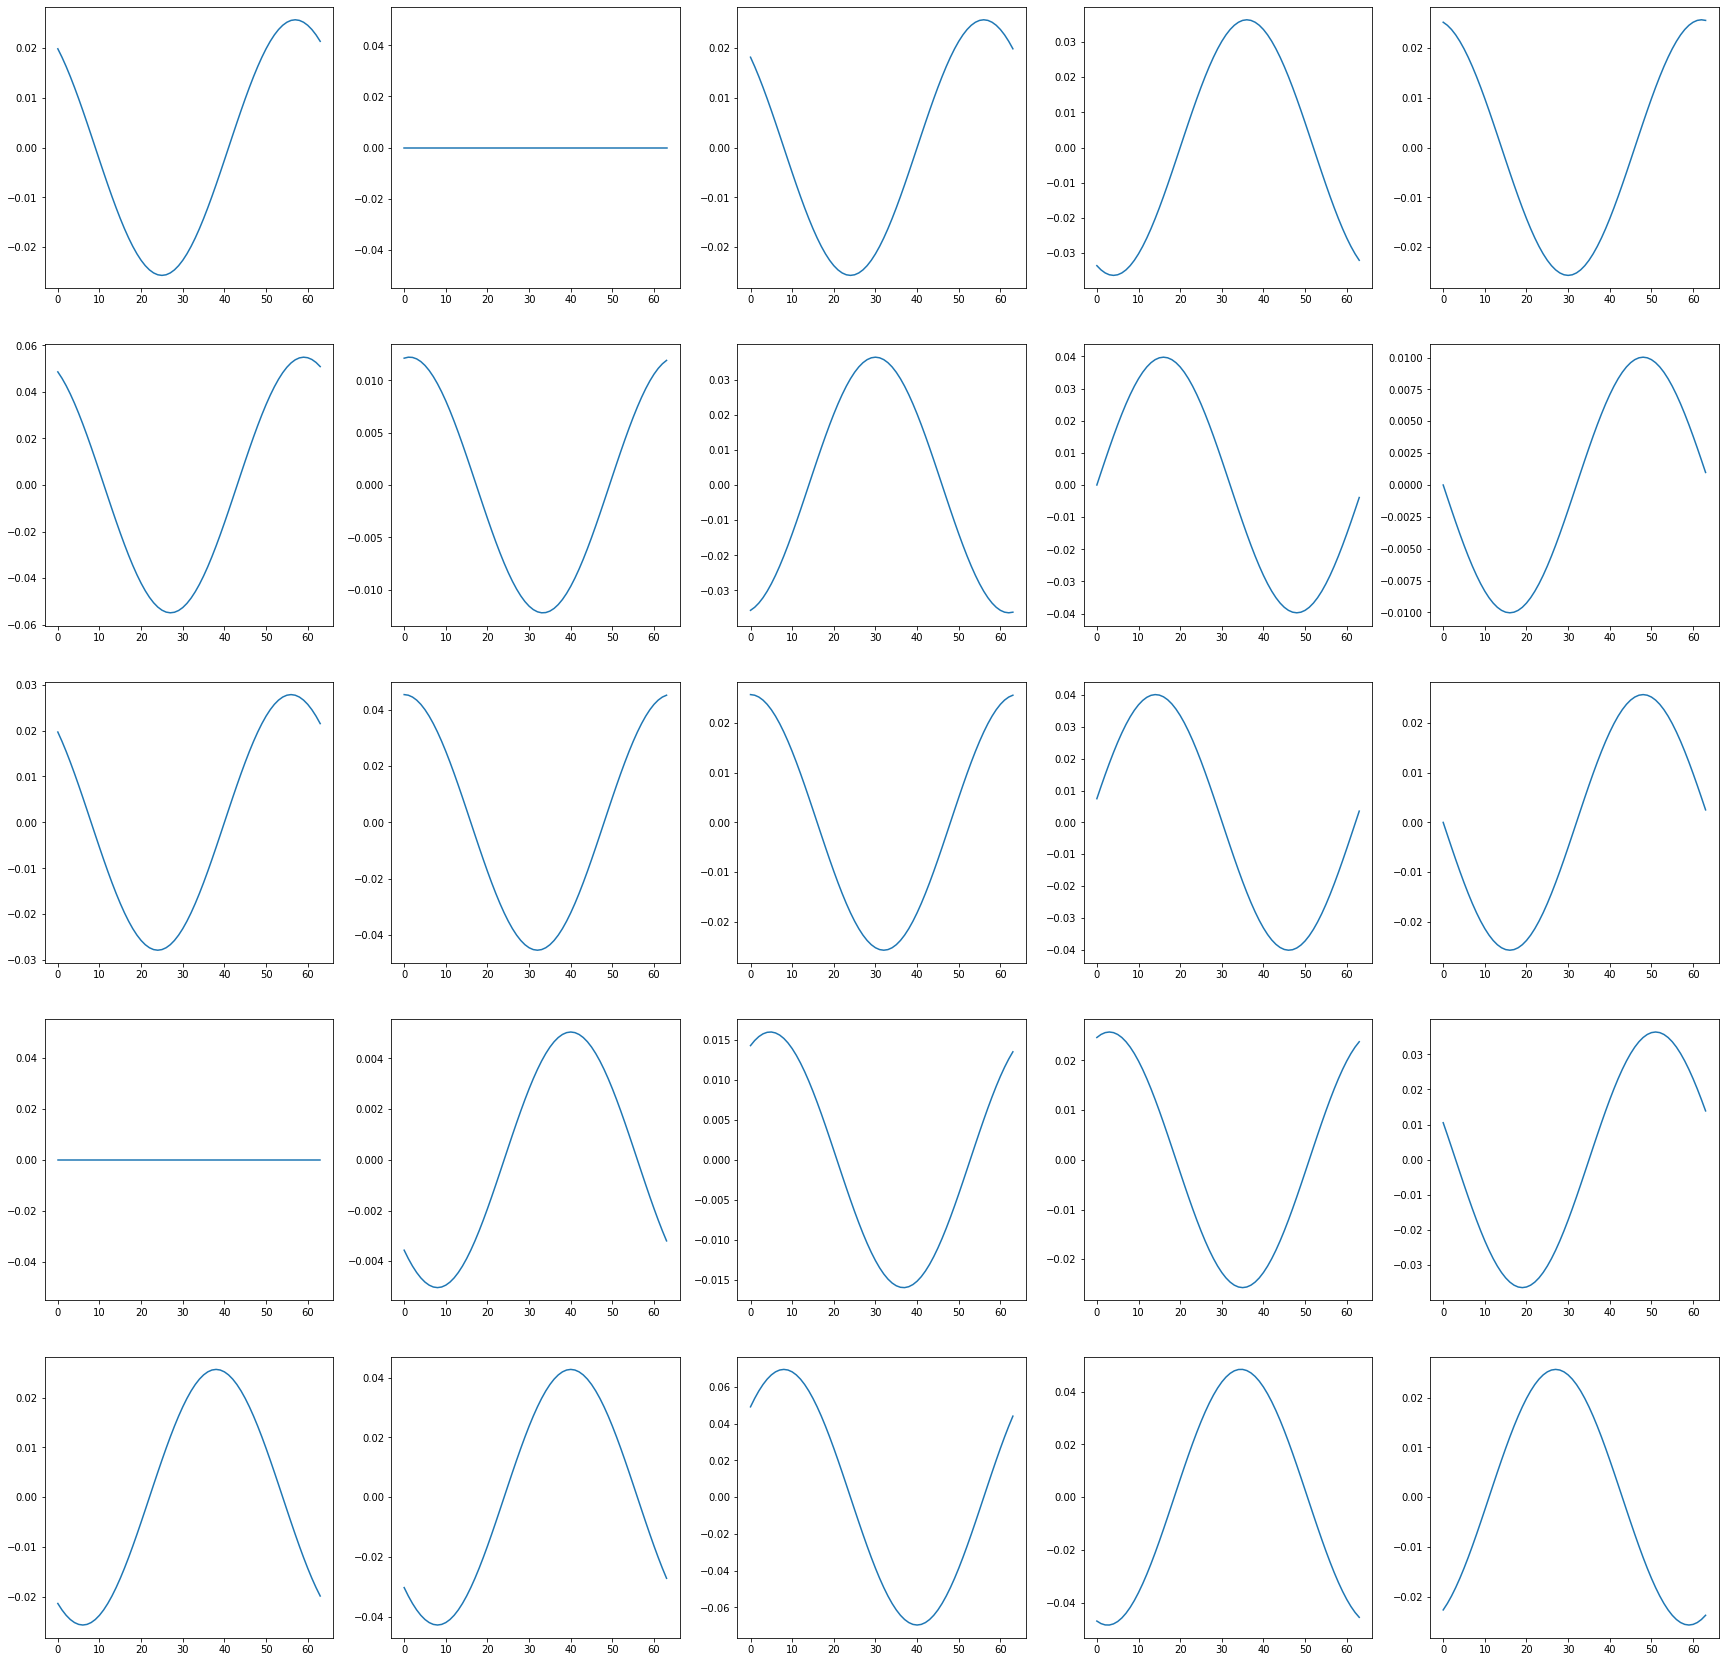

In [3]:
many_samples(DIM, 1, 5, 5, True)

## 2  lowest modes

modes = 2

112 modes selected out of 28672 (0.0%) (zero-valued modes are also ignored)
      Mean	 Sigma
      ----	 -----
      0.0 	 0.04
      0.0 	 0.04
      -0.0 	 0.04
      -0.0 	 0.04
      -0.0 	 0.04
      -0.0 	 0.04
      0.0 	 0.04
      0.0 	 0.04
      0.0 	 0.04
      0.0 	 0.04
      -0.0 	 0.04
      -0.0 	 0.04
      -0.0 	 0.04
      -0.0 	 0.04
      0.0 	 0.04
      0.0 	 0.04
      -0.0 	 0.04
      0.0 	 0.04
      -0.0 	 0.04
      -0.0 	 0.04
      0.0 	 0.04
      -0.0 	 0.04
      -0.0 	 0.04
      -0.0 	 0.04
      -0.0 	 0.04
      ----	  -----
Avg:  -0.0 	 0.04



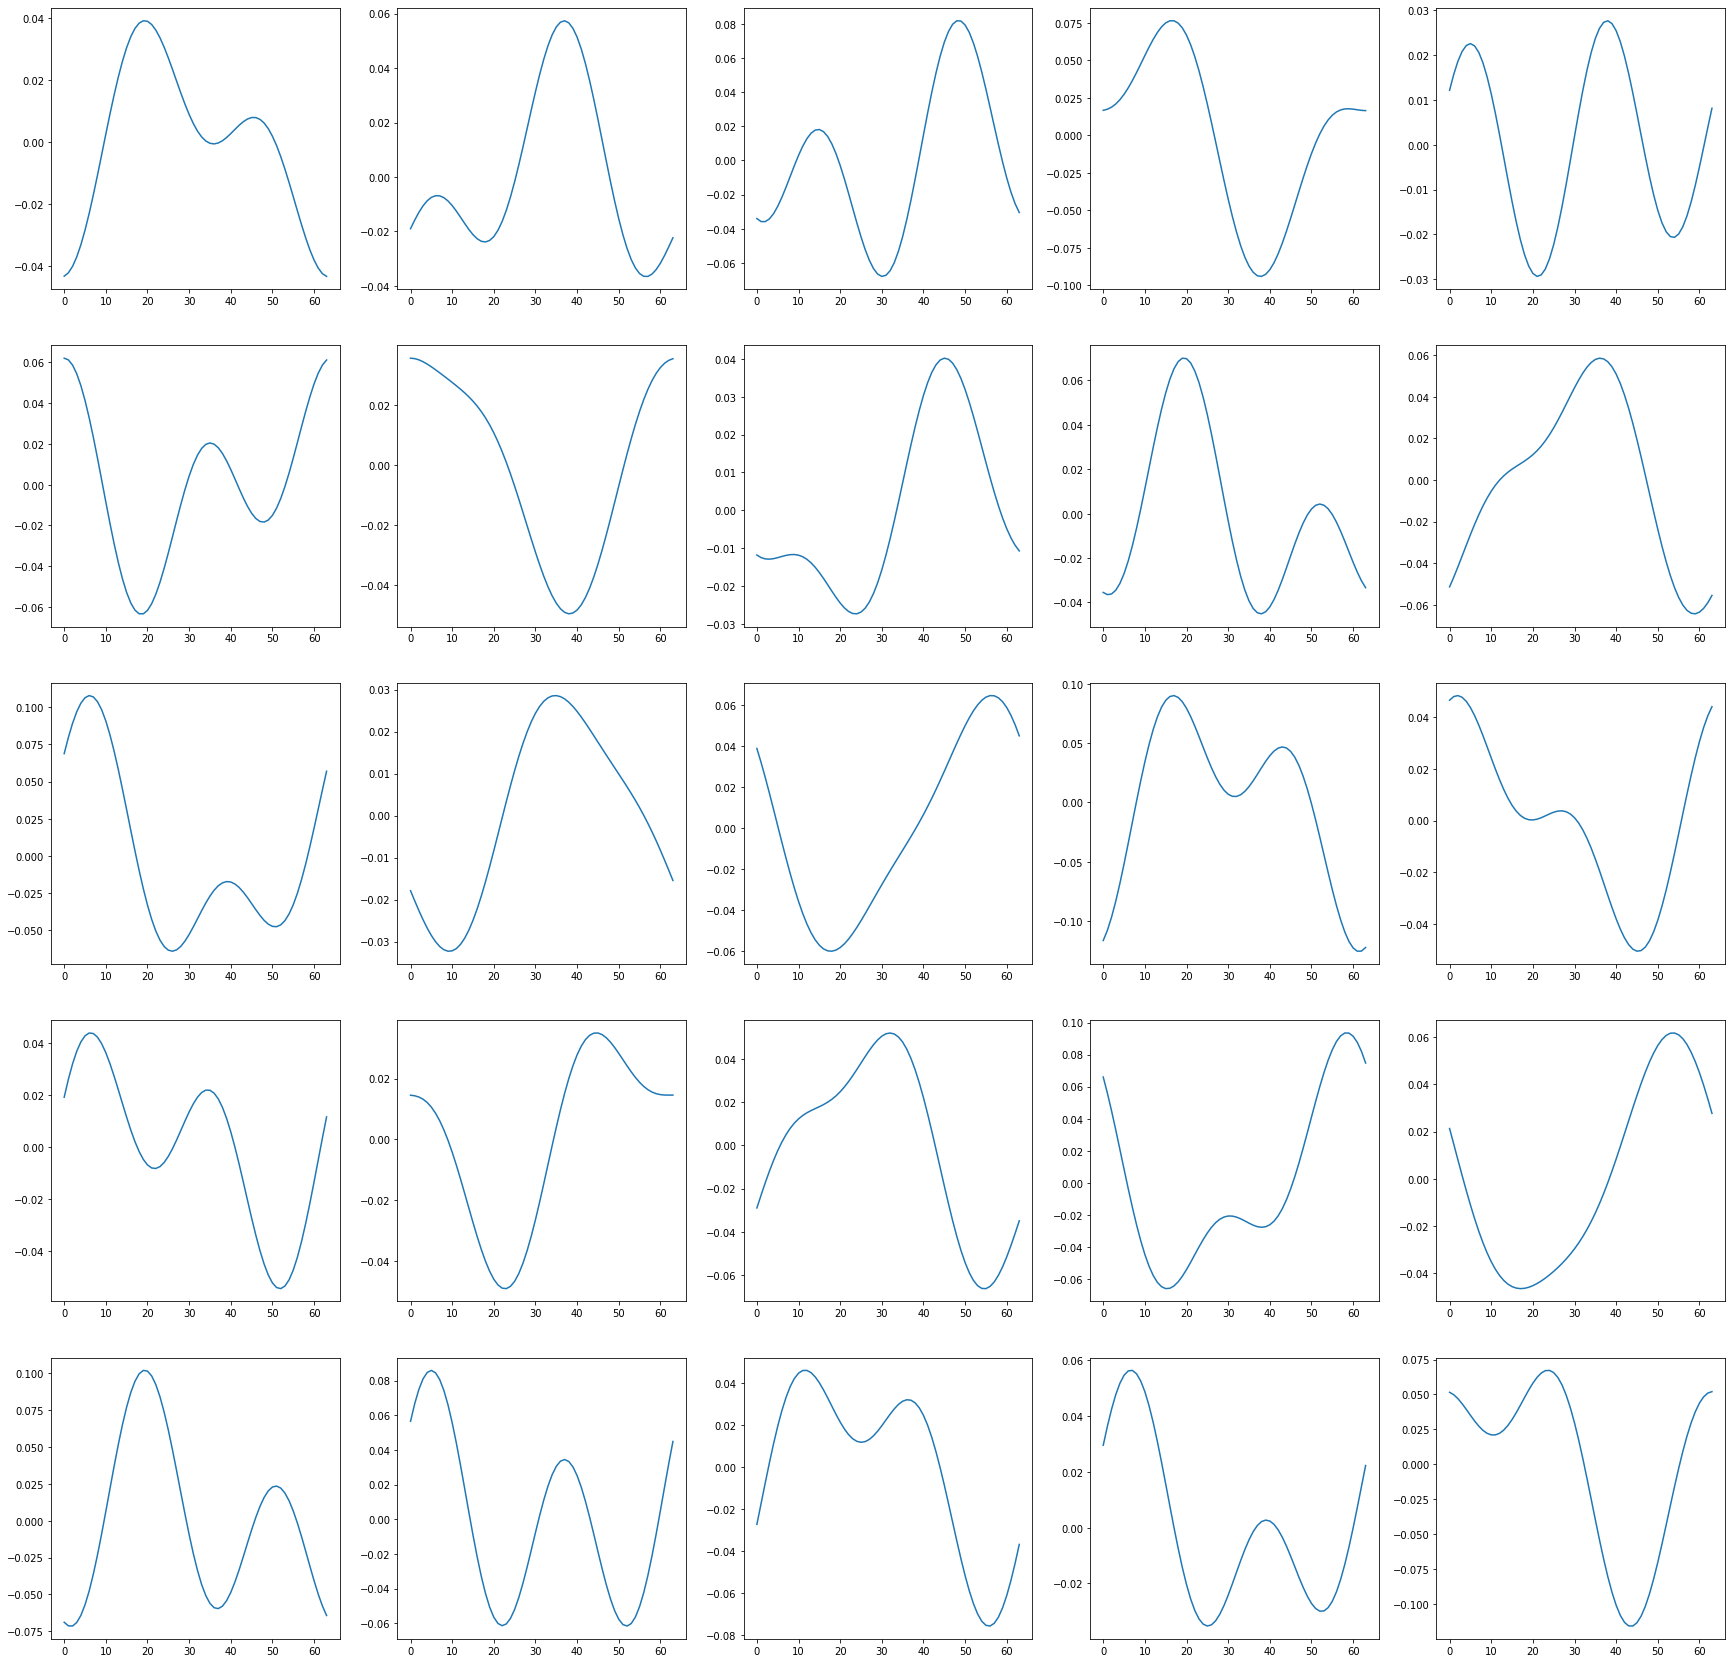

In [4]:
many_samples(DIM, 2, 5, 5, True)

## All modes

modes = None

832 modes selected out of 28672 (3.0%) (zero-valued modes are also ignored)
      Mean	 Sigma
      ----	 -----
      -0.0 	 0.047
      -0.0 	 0.047
      -0.0 	 0.047
      0.0 	 0.047
      0.0 	 0.047
      0.0 	 0.047
      -0.0 	 0.047
      -0.0 	 0.047
      -0.0 	 0.047
      0.0 	 0.047
      -0.0 	 0.047
      -0.0 	 0.047
      -0.0 	 0.047
      -0.0 	 0.047
      0.0 	 0.047
      -0.0 	 0.047
      -0.0 	 0.047
      0.0 	 0.047
      0.0 	 0.047
      -0.0 	 0.047
      -0.0 	 0.047
      0.0 	 0.047
      0.0 	 0.047
      -0.0 	 0.047
      0.0 	 0.047
      ----	  -----
Avg:  0.0 	 0.047



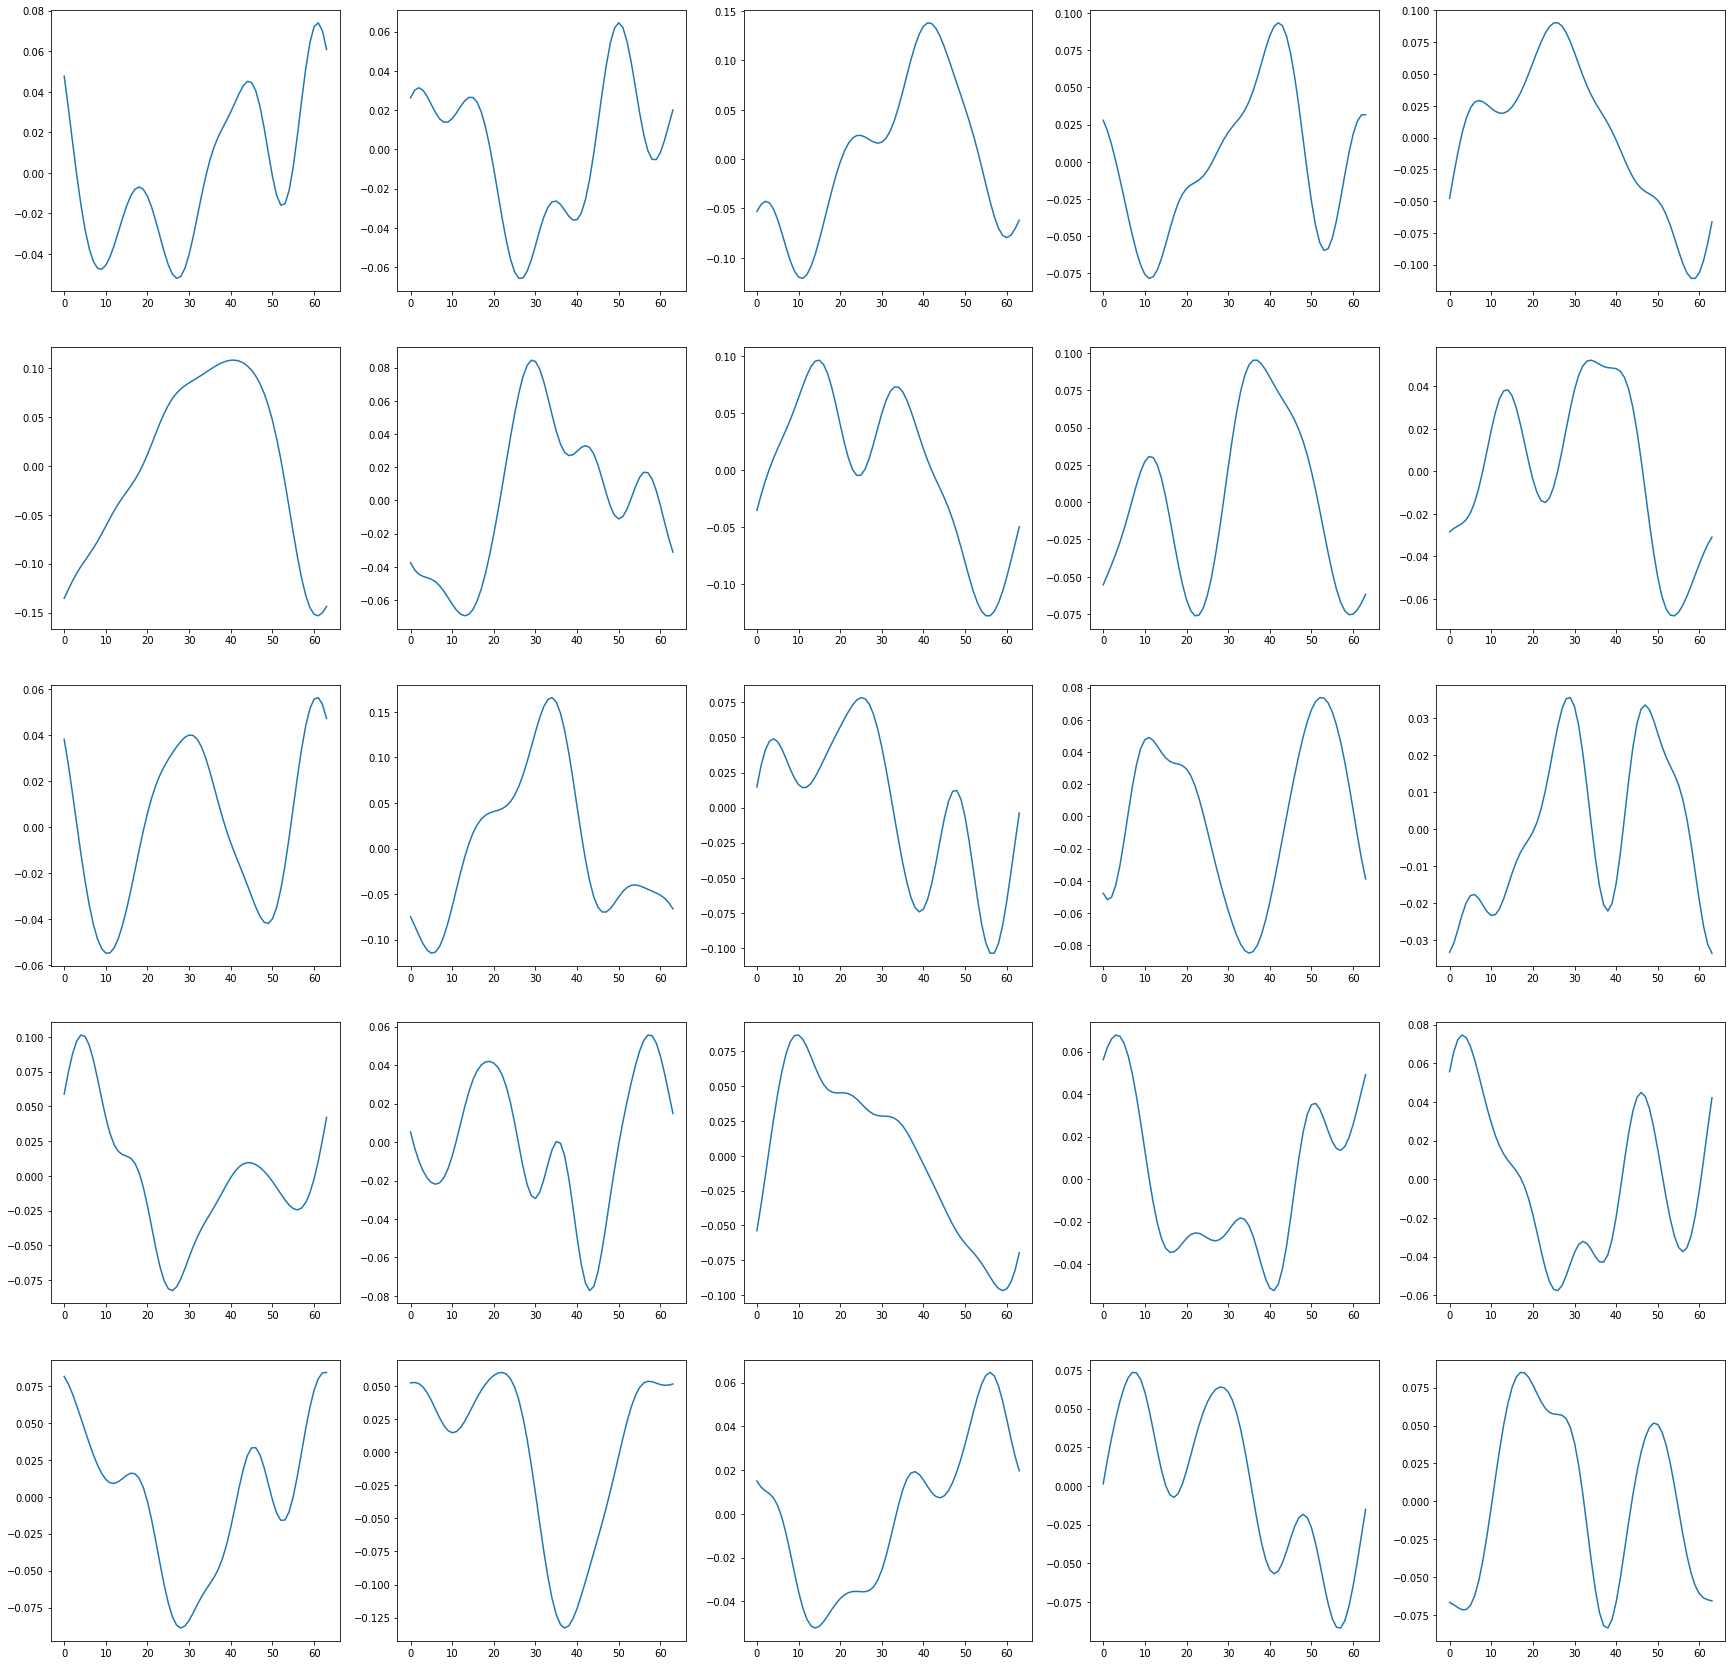

In [5]:
many_samples(DIM, None, 5, 5, True)

# Examples of the Gaussian FFT prior (2)

Using true sampling. The amplitude of the modes can be anything, within the variance specified in the prior. This means that low modes could get a low amplitude, and high modes a high amplitude.

Do the above tests again.

## Only lowest mode 

modes = 1

28 modes selected out of 28672 (0.0%) (zero-valued modes are also ignored)
      Mean	 Sigma
      ----	 -----
      0.0 	 0.0156
      0.0 	 0.0339
      0.0 	 0.0247
      0.0 	 0.0344
      0.0 	 0.0175
      0.0 	 0.0366
      0.0 	 0.0174
      0.0 	 0.0281
      0.0 	 0.0225
      0.0 	 0.0244
      0.0 	 0.0326
      0.0 	 0.031
      0.0 	 0.0244
      0.0 	 0.0157
      0.0 	 0.0198
      0.0 	 0.0383
      0.0 	 0.0238
      0.0 	 0.0253
      0.0 	 0.0222
      0.0 	 0.0275
      0.0 	 0.0343
      0.0 	 0.0289
      0.0 	 0.0336
      0.0 	 0.0191
      0.0 	 0.038
      ----	  -----
Avg:  0.0 	 0.0268



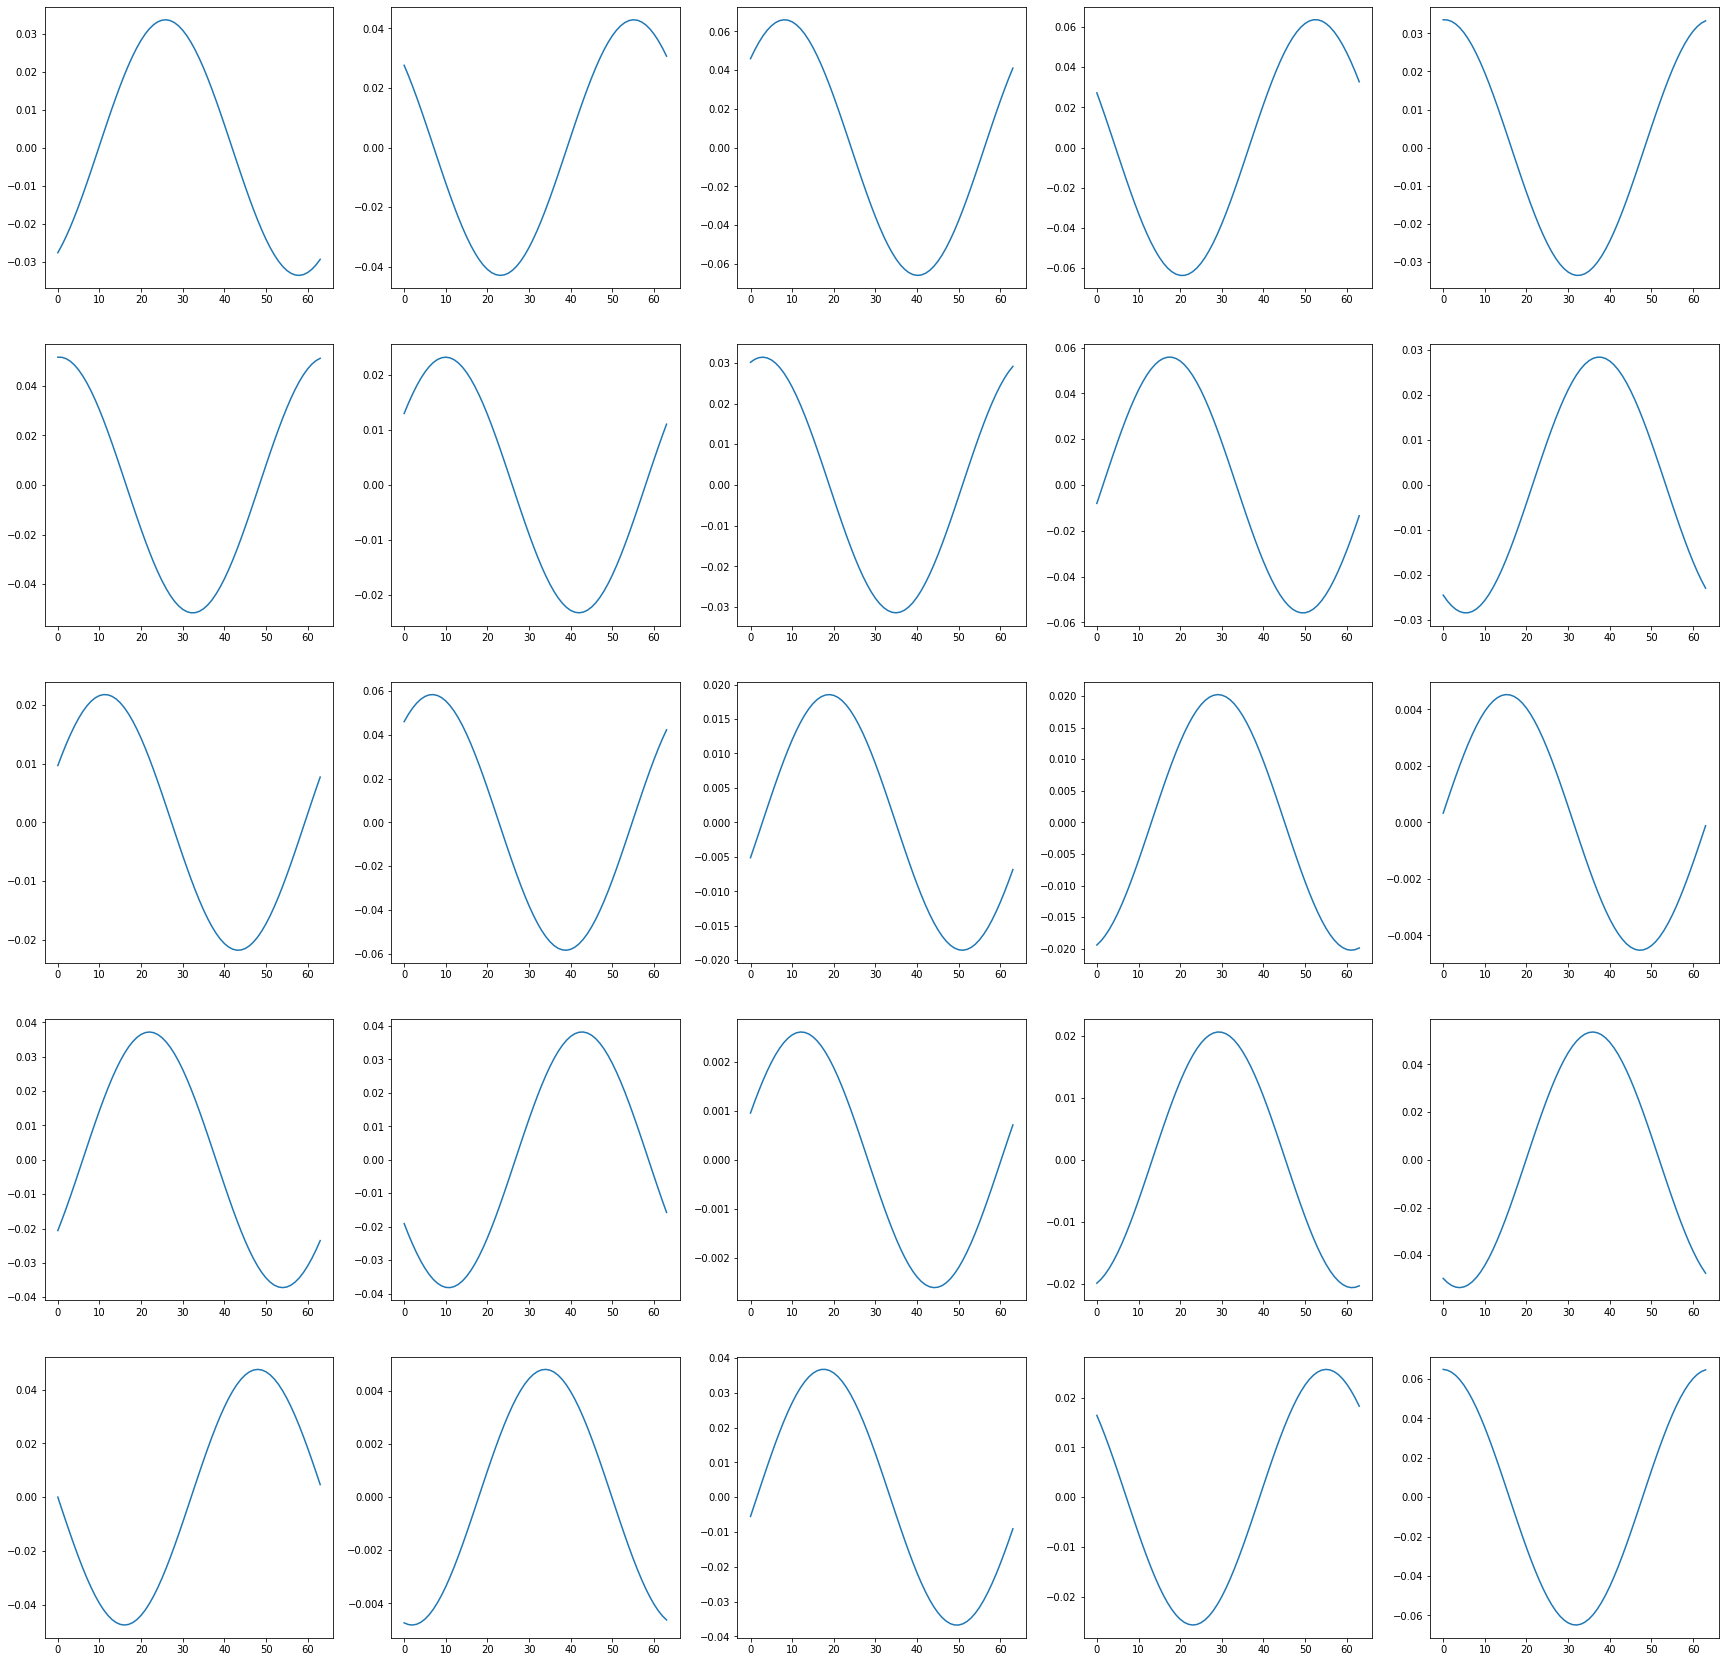

In [6]:
many_samples(DIM, 1, 5, 5, False)

## 2  lowest modes

modes = 2

252 modes selected out of 28672 (1.0%) (zero-valued modes are also ignored)
      Mean	 Sigma
      ----	 -----
      -0.0 	 0.0679
      0.0 	 0.0701
      0.0 	 0.0646
      0.0 	 0.0672
      -0.0 	 0.0608
      0.0 	 0.0704
      0.0 	 0.0511
      -0.0 	 0.057
      -0.0 	 0.0626
      0.0 	 0.0696
      -0.0 	 0.0574
      -0.0 	 0.0646
      -0.0 	 0.0604
      -0.0 	 0.0604
      -0.0 	 0.0639
      0.0 	 0.0521
      0.0 	 0.0552
      0.0 	 0.0616
      0.0 	 0.0672
      0.0 	 0.0713
      -0.0 	 0.0606
      0.0 	 0.0704
      0.0 	 0.0602
      -0.0 	 0.0571
      0.0 	 0.0624
      ----	  -----
Avg:  0.0 	 0.0626



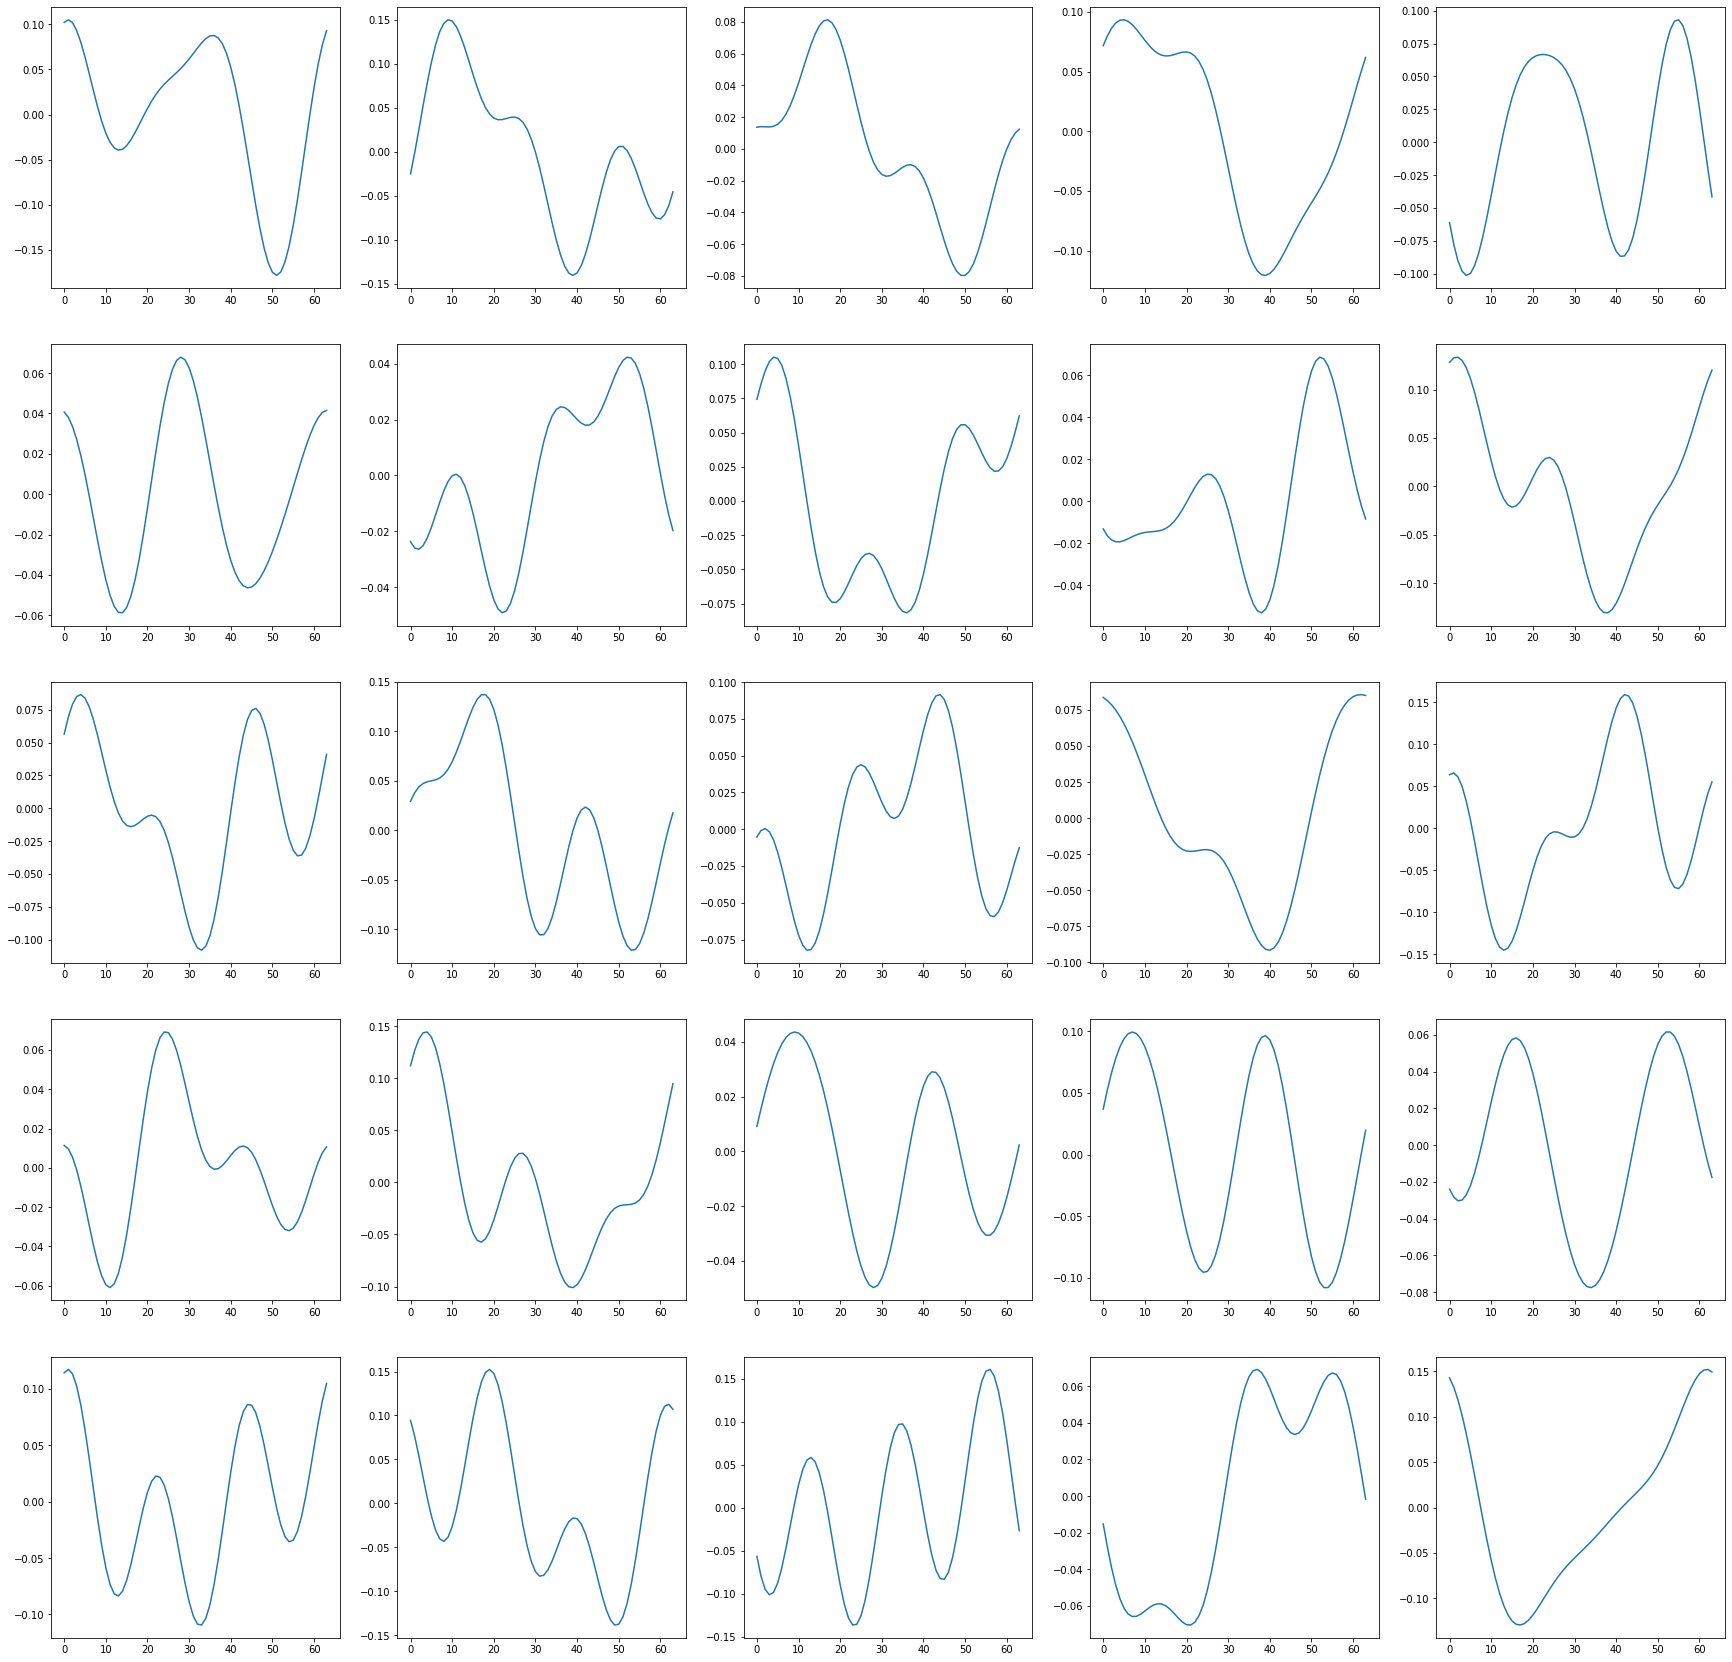

In [7]:
many_samples(DIM, 3, 5, 5, False)

## All modes

modes = None

832 modes selected out of 28672 (3.0%) (zero-valued modes are also ignored)
      Mean	 Sigma
      ----	 -----
      0.0 	 0.0699
      0.0 	 0.0739
      0.0 	 0.0703
      -0.0 	 0.0811
      0.0 	 0.066
      -0.0 	 0.083
      0.0 	 0.0698
      -0.0 	 0.0737
      -0.0 	 0.0713
      0.0 	 0.0746
      -0.0 	 0.0736
      -0.0 	 0.0786
      0.0 	 0.0726
      0.0 	 0.067
      -0.0 	 0.0697
      -0.0 	 0.0703
      0.0 	 0.0722
      0.0 	 0.0579
      -0.0 	 0.0722
      -0.0 	 0.0704
      -0.0 	 0.0816
      -0.0 	 0.0655
      -0.0 	 0.0859
      0.0 	 0.0737
      -0.0 	 0.0784
      ----	  -----
Avg:  -0.0 	 0.0729



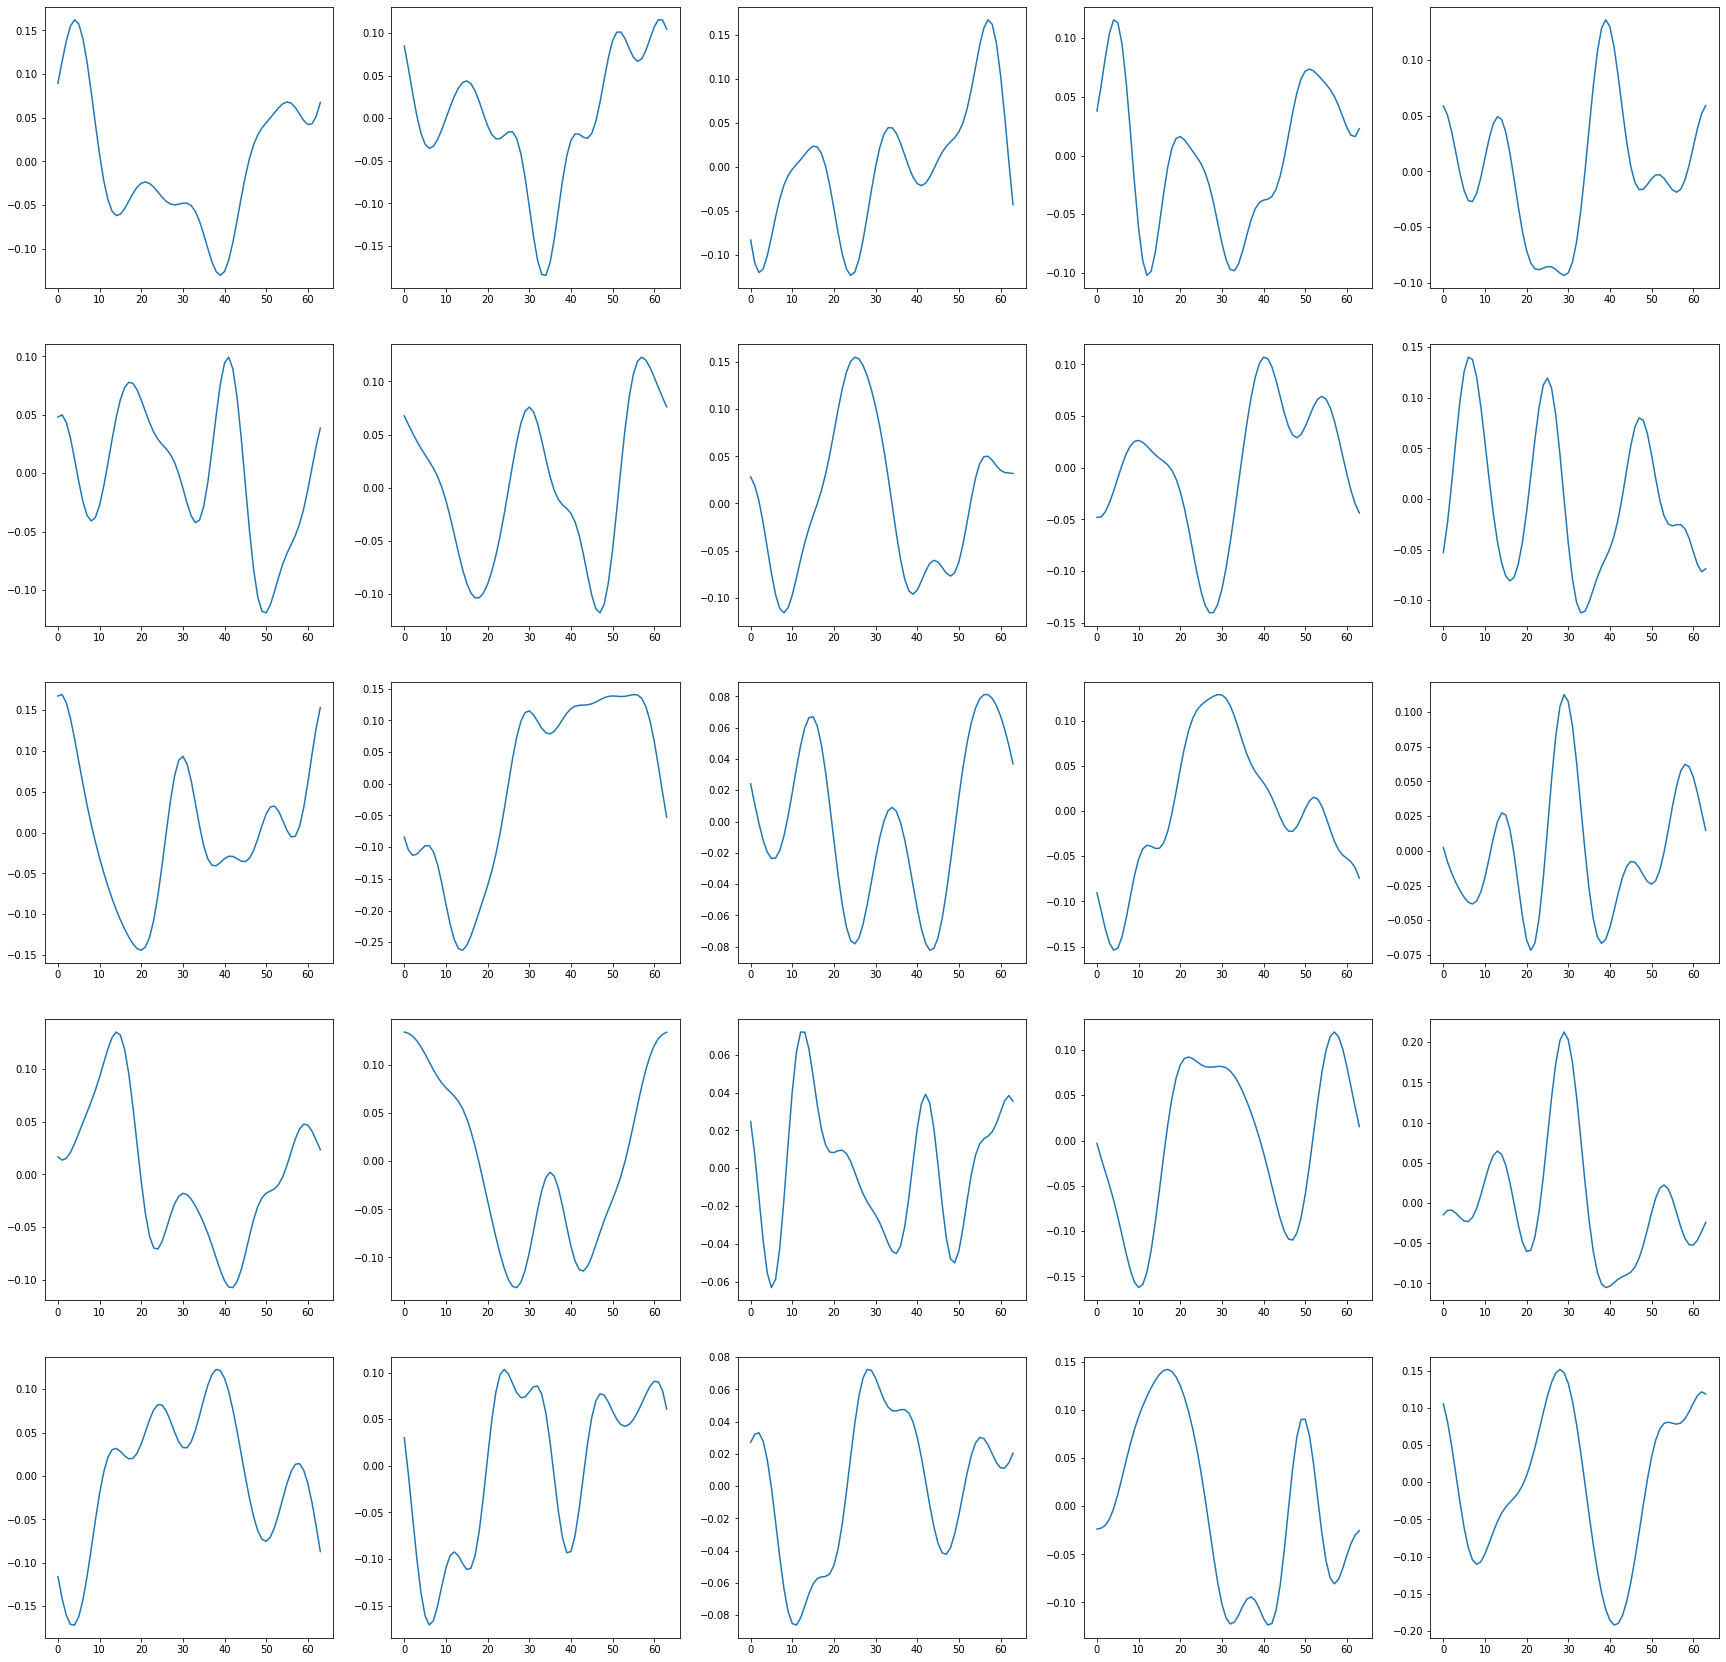

In [8]:
many_samples(DIM, None, 5, 5, False)

# Examples of the Gaussian FFT prior (3)

Same as (2) but see what happens when DIM is only 16, i.e. 16 times/freqs

In [9]:
DIM = 16

## Only lowest mode 

modes = 1

28 modes selected out of 1792 (2.0%) (zero-valued modes are also ignored)
      Mean	 Sigma
      ----	 -----
      0.0 	 0.1153
      0.0 	 0.1057
      0.0 	 0.0927
      0.0 	 0.0599
      0.0 	 0.1445
      0.0 	 0.1065
      0.0 	 0.1139
      0.0 	 0.1163
      0.0 	 0.1599
      0.0 	 0.0691
      0.0 	 0.1228
      0.0 	 0.0555
      0.0 	 0.0901
      0.0 	 0.1095
      0.0 	 0.1452
      0.0 	 0.1089
      0.0 	 0.0732
      0.0 	 0.0423
      0.0 	 0.1187
      0.0 	 0.0987
      0.0 	 0.0892
      0.0 	 0.0963
      0.0 	 0.104
      0.0 	 0.0686
      0.0 	 0.1213
      ----	  -----
Avg:  0.0 	 0.1011



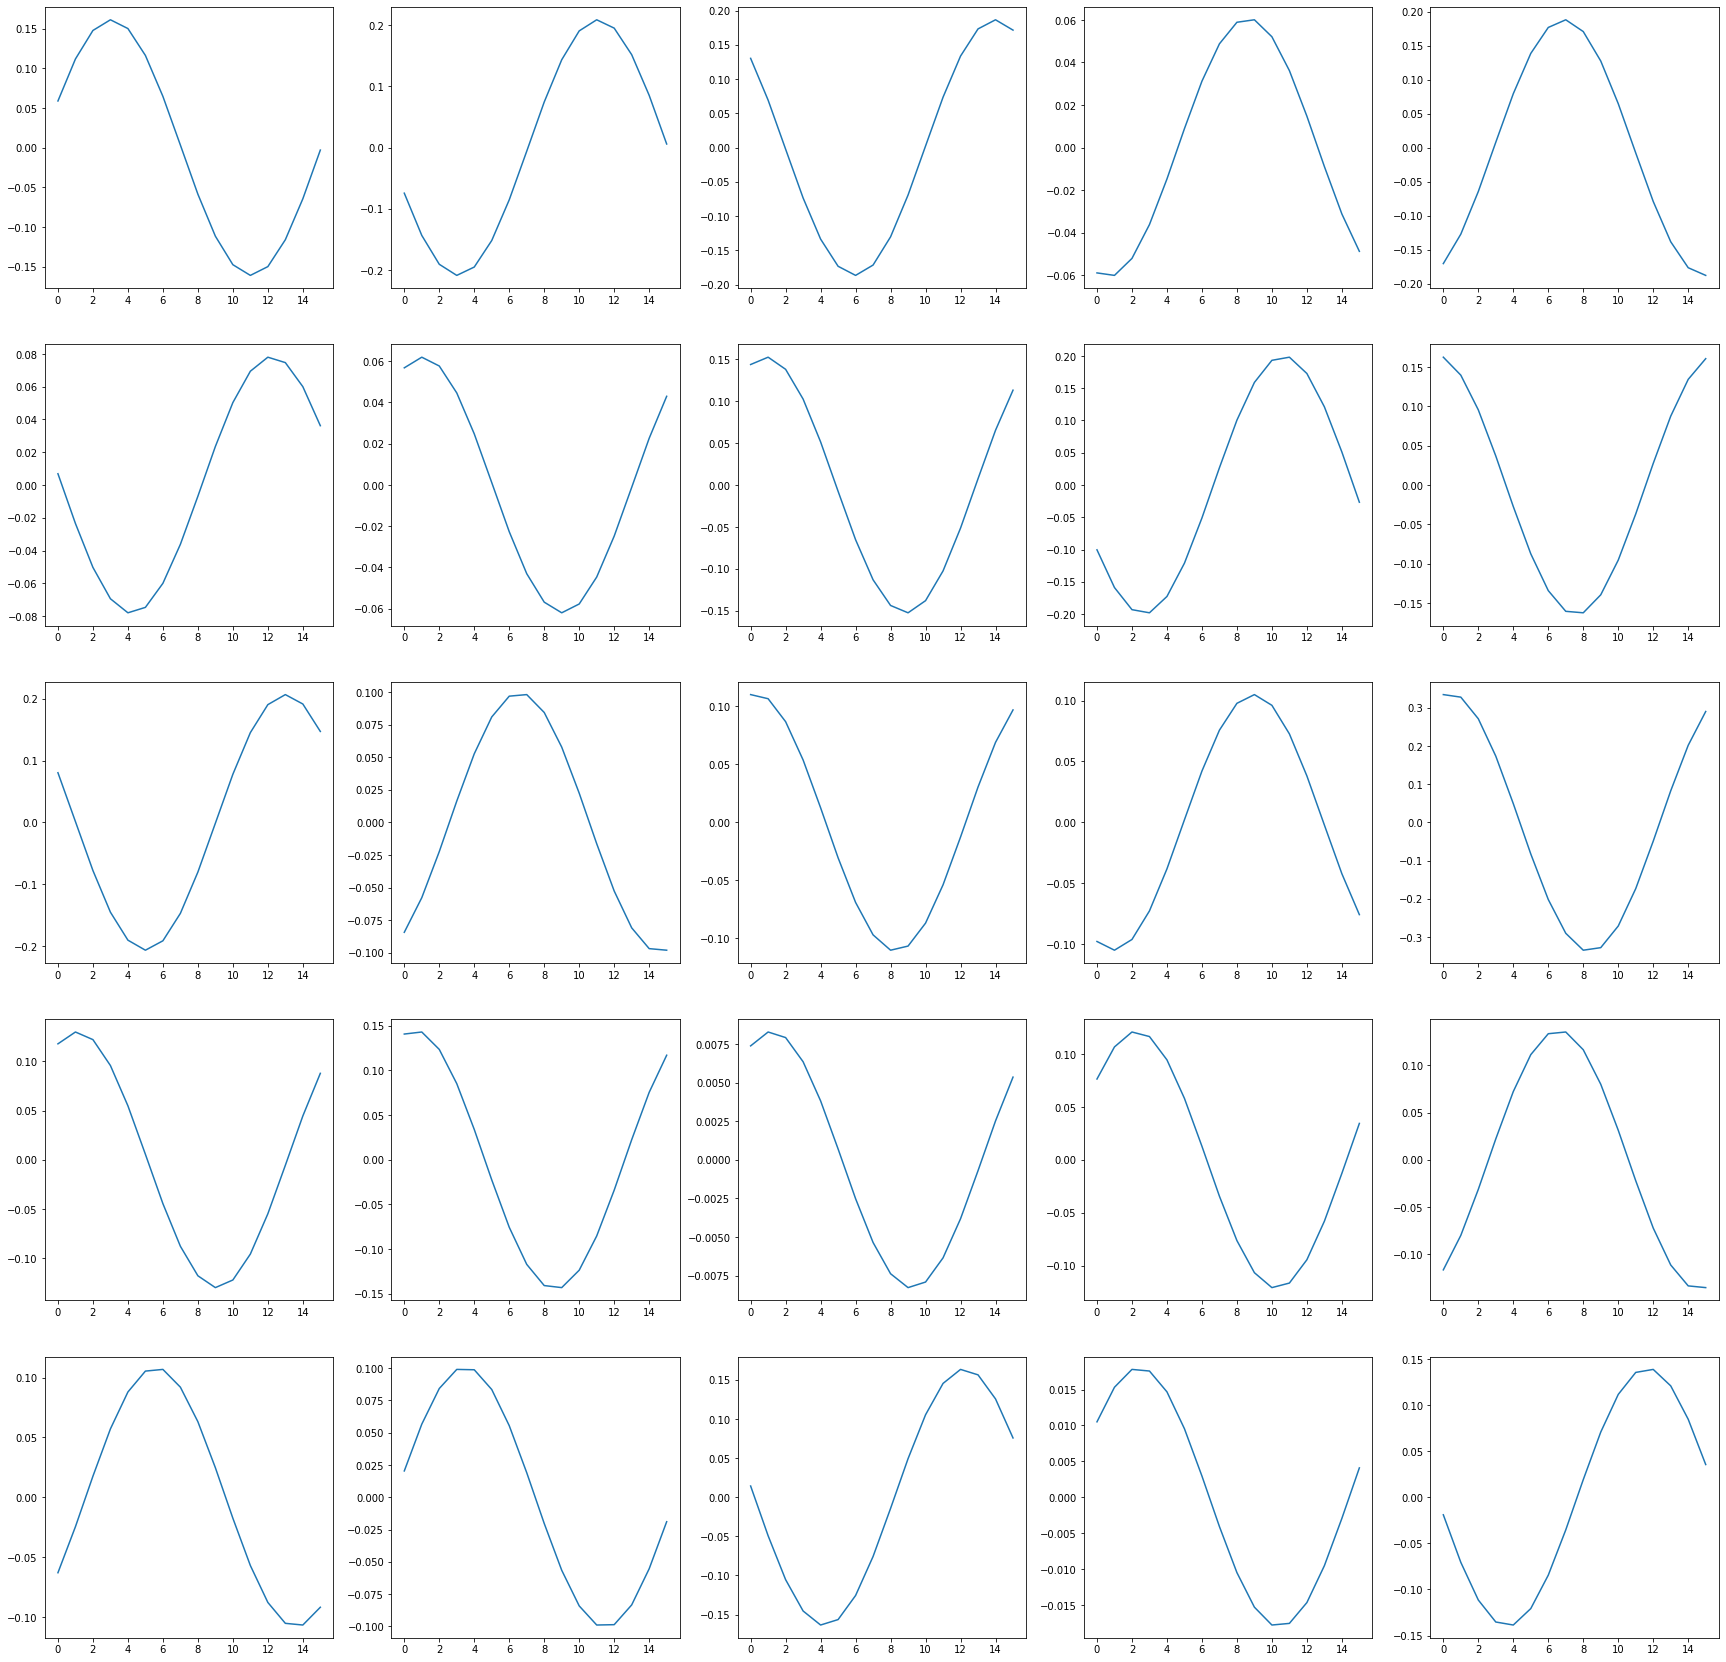

In [10]:
many_samples(DIM, 1, 5, 5, False)

## 2  lowest modes

modes = 2

112 modes selected out of 1792 (6.0%) (zero-valued modes are also ignored)
      Mean	 Sigma
      ----	 -----
      -0.0 	 0.2088
      0.0 	 0.2083
      -0.0 	 0.1873
      -0.0 	 0.2194
      -0.0 	 0.2064
      0.0 	 0.1825
      0.0 	 0.19
      0.0 	 0.2076
      -0.0 	 0.2369
      -0.0 	 0.2063
      -0.0 	 0.1941
      -0.0 	 0.2304
      -0.0 	 0.214
      0.0 	 0.1815
      0.0 	 0.1625
      -0.0 	 0.2158
      -0.0 	 0.2219
      0.0 	 0.2062
      -0.0 	 0.1689
      0.0 	 0.1772
      0.0 	 0.1898
      0.0 	 0.2442
      -0.0 	 0.1939
      0.0 	 0.1951
      -0.0 	 0.1579
      ----	  -----
Avg:  -0.0 	 0.2003



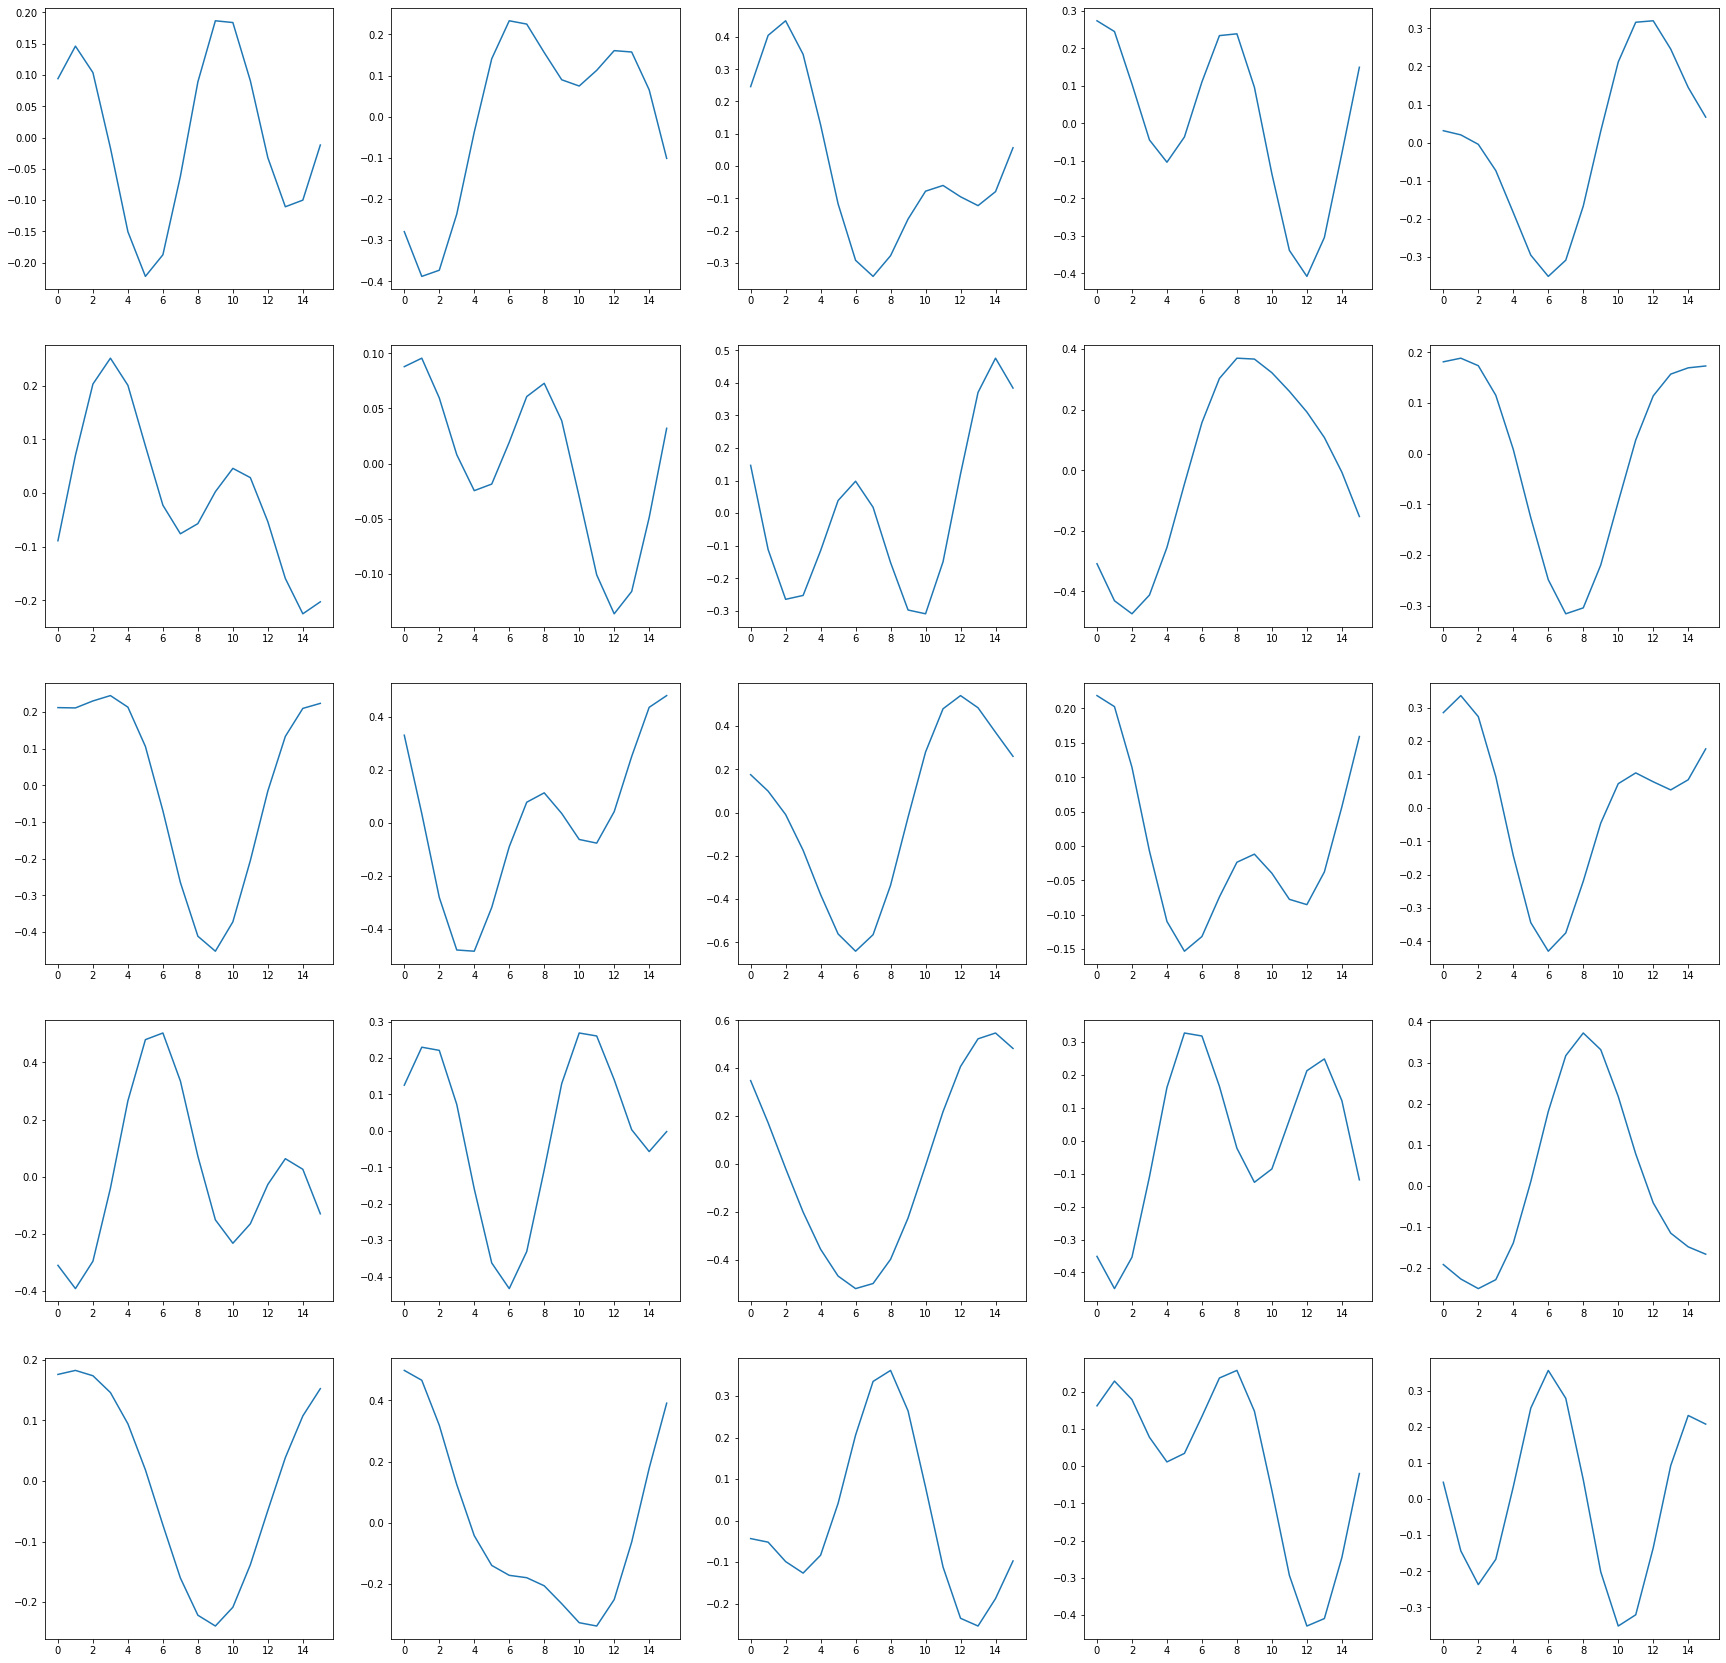

In [11]:
many_samples(DIM, 2, 5, 5, False)

## All modes

modes = None

832 modes selected out of 1792 (46.0%) (zero-valued modes are also ignored)
      Mean	 Sigma
      ----	 -----
      -0.0 	 0.3068
      0.0 	 0.2564
      -0.0 	 0.3018
      0.0 	 0.2732
      -0.0 	 0.3097
      0.0 	 0.3024
      0.0 	 0.3164
      0.0 	 0.2735
      -0.0 	 0.3012
      -0.0 	 0.308
      -0.0 	 0.26
      0.0 	 0.2839
      0.0 	 0.2771
      0.0 	 0.246
      -0.0 	 0.2793
      0.0 	 0.3044
      -0.0 	 0.3148
      -0.0 	 0.3036
      -0.0 	 0.2657
      0.0 	 0.2888
      0.0 	 0.2889
      0.0 	 0.32
      0.0 	 0.2906
      0.0 	 0.2871
      0.0 	 0.2775
      ----	  -----
Avg:  0.0 	 0.2895



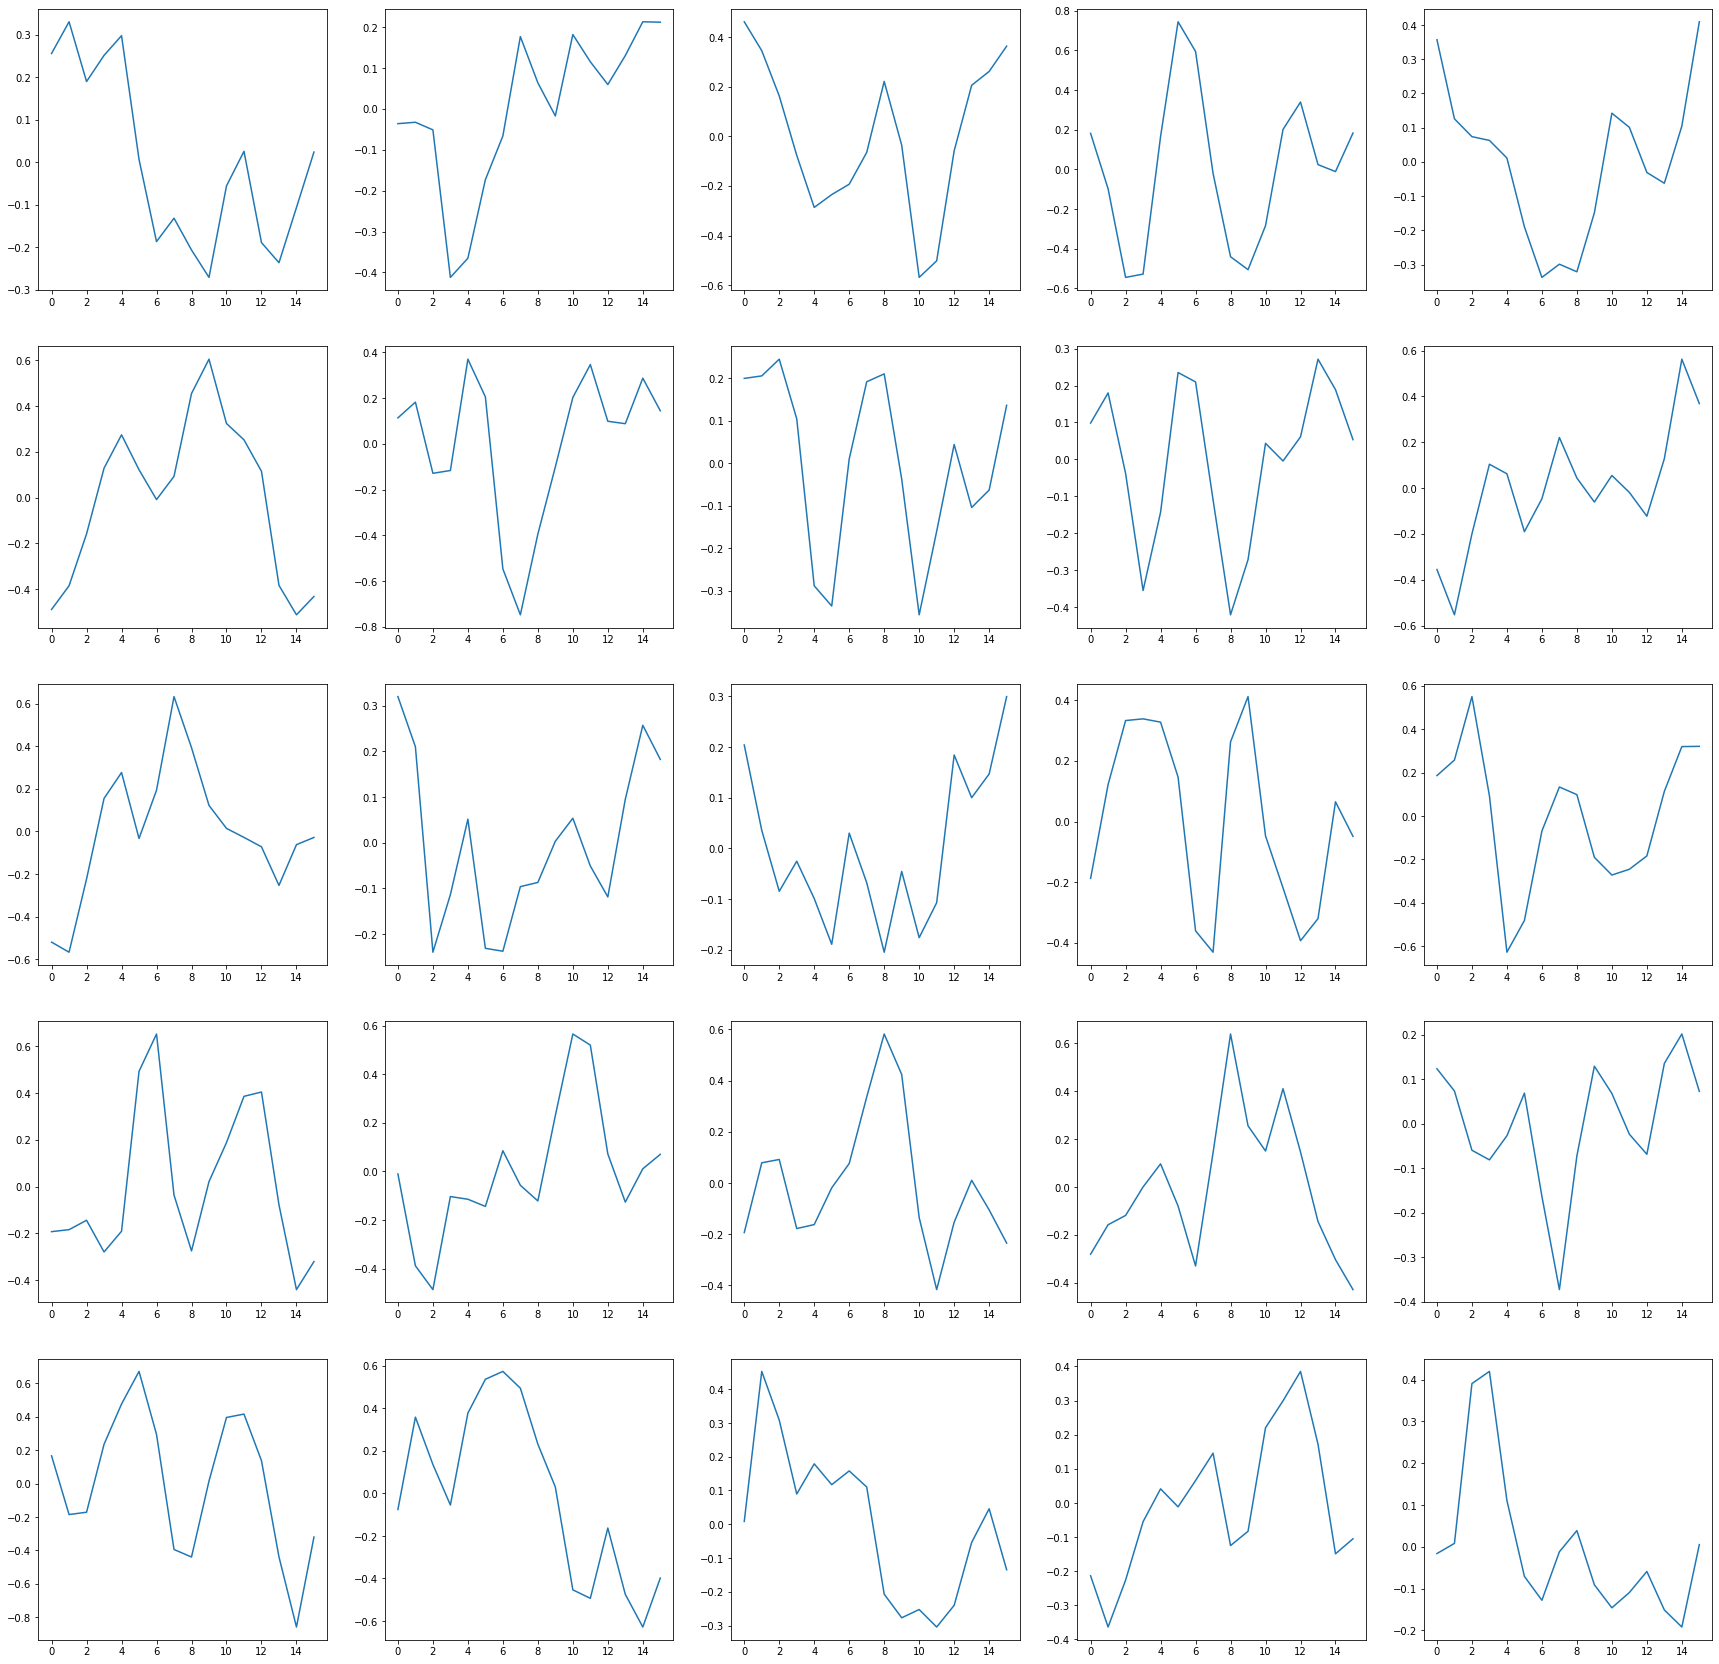

In [12]:
many_samples(DIM, None, 5, 5, False)

112 modes selected out of 1792 (6.0%) (zero-valued modes are also ignored)
      Mean	 Sigma
      ----	 -----
      0.0 	 0.1873
      0.0 	 0.2071
      -0.0 	 0.2004
      0.0 	 0.2042
      0.0 	 0.1925
      -0.0 	 0.2004
      0.0 	 0.1959
      -0.0 	 0.221
      -0.0 	 0.2253
      0.0 	 0.196
      0.0 	 0.2348
      0.0 	 0.2068
      -0.0 	 0.1789
      0.0 	 0.224
      0.0 	 0.176
      -0.0 	 0.1675
      0.0 	 0.188
      0.0 	 0.1825
      0.0 	 0.1849
      0.0 	 0.1951
      0.0 	 0.2156
      -0.0 	 0.2208
      0.0 	 0.2345
      -0.0 	 0.2142
      0.0 	 0.2001
      ----	  -----
Avg:  0.0 	 0.2021



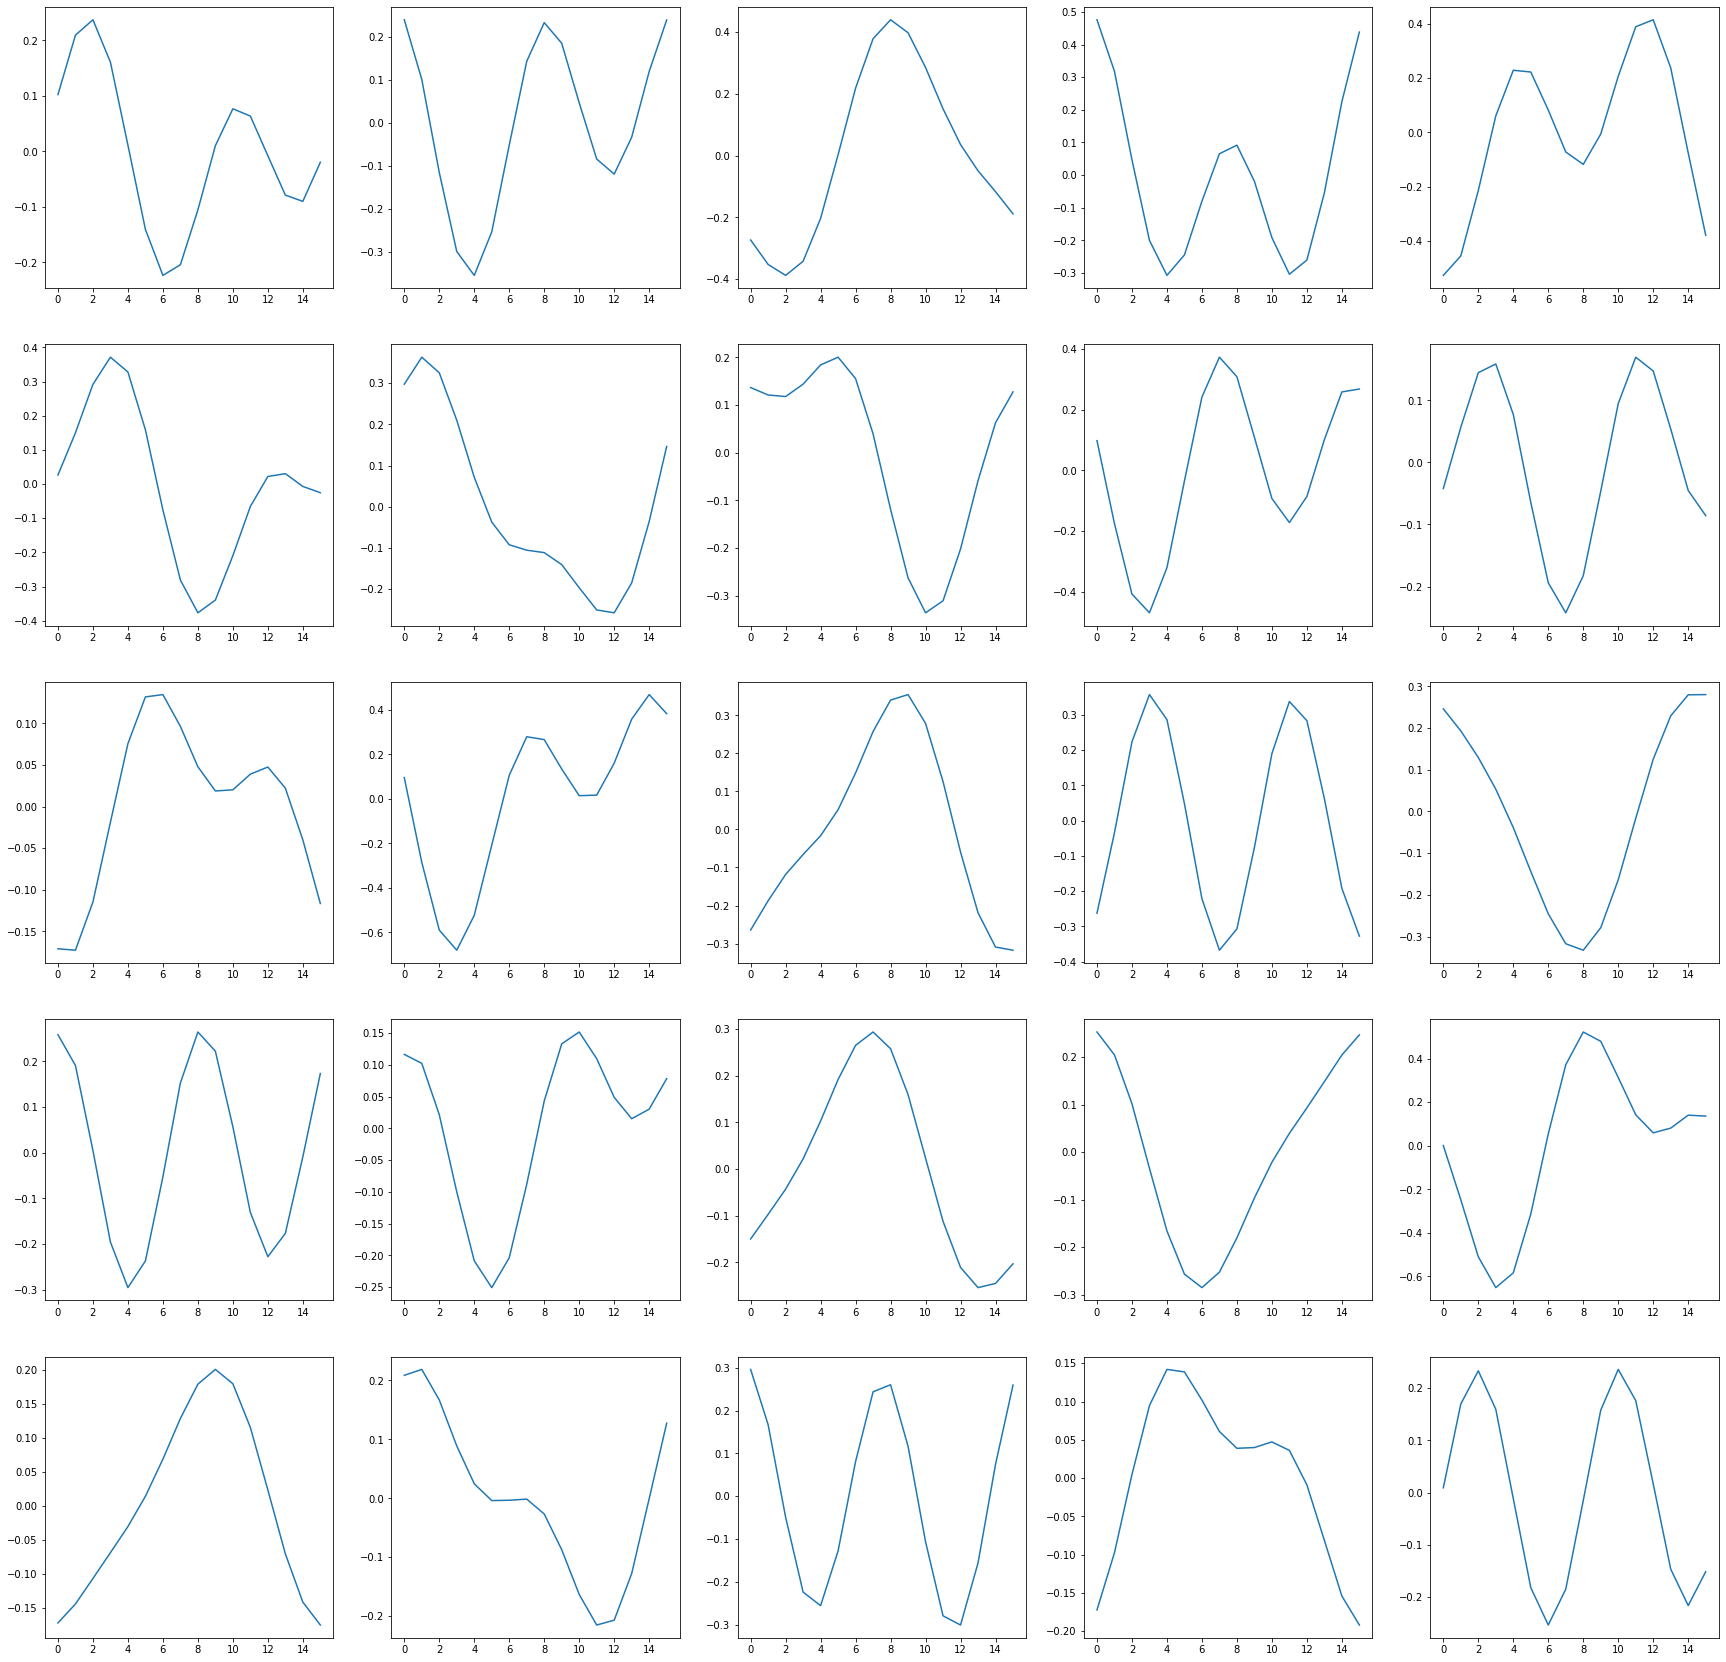

In [13]:
DIM = 16
many_samples(DIM, 2, 5, 5, False)

# Show how to estimate the variance of the x values from the prior

The prior is the function used to generate S, i.e. gaussian plus arguments to generate_S(). Match these with what you want to use in the sampling.

The number you want is the average variance from the plots, and the plots should be flat overall. The average variance is the variance on the x values. To change the average variance, use the scale parameter on generate_S().

In [14]:
yaml_file = "yaml_files/sampler.yaml"
with open(yaml_file) as f:
    cfg = yaml.load(f, Loader=yaml.FullLoader)


if cfg["modes"]["pattern"] == "dc":
    pattern = lambda x, y: 1 if x==0 and y == 0 else 0
elif cfg["modes"]["pattern"] == "gauss":
    pattern = lambda x, y: np.exp(-0.5*(x**2+y**2)/.005)
elif cfg["modes"]["pattern"] == "random":
    pattern = lambda x, y: np.random.random(size=1)
elif cfg["modes"]["pattern"] == "flat":
    pattern = lambda x, y: 1
else:
    raise ValueError("Invalid mode pattern")


# There is a relationship with these. If the values are (each) doubled the sigma is halved.
ntime = 16
nfreq = 16

sm = SManager(ntime, nfreq, 10)
_, data, _ = sm.generate_S(pattern, modes=cfg["modes"]["num"], ignore_threshold=0, zoom_from=cfg["modes"]["zoom_from"], 
              scale=cfg["modes"]["scale"], view=True)  

niter = 10000
samples = np.zeros((niter, ntime*nfreq*2))
for i in range(niter):
    samples[i] = sm.sample("x")
    
rvariances = np.var(samples[:, :ntime*nfreq], axis=0)

ivariances = np.var(samples[:, ntime*nfreq:], axis=0)




304 modes selected out of 4864 (6.0%) (zero-valued modes are also ignored)


sigma: 0.1009962


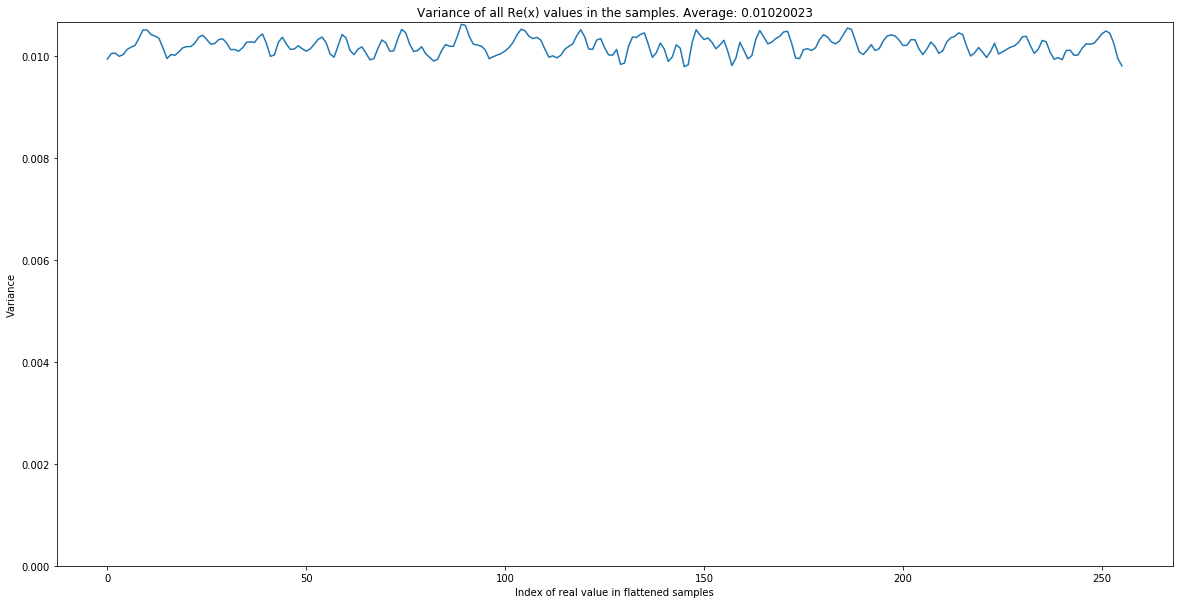

In [15]:
print("sigma: "+str(round(np.sqrt(np.mean(rvariances)),8)))
plt.figure(figsize=(20, 10))
plt.plot(rvariances)
plt.ylim(ymin=0)
plt.xlabel("Index of real value in flattened samples")
plt.ylabel("Variance")
_ = plt.title("Variance of all Re(x) values in the samples. Average: "+str(round(np.mean(rvariances),8)))
    

sigma: 0.10042032


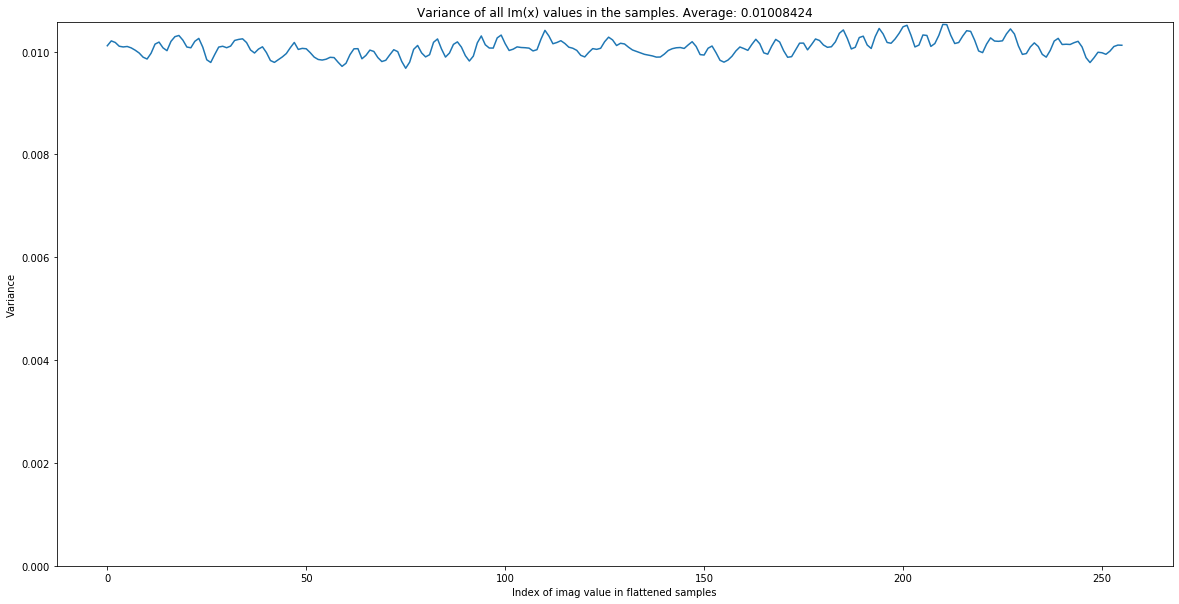

In [16]:
print("sigma: "+str(round(np.sqrt(np.mean(ivariances)),8)))
plt.figure(figsize=(20, 10))
plt.plot(ivariances)
plt.ylim(ymin=0)
plt.xlabel("Index of imag value in flattened samples")
plt.ylabel("Variance")
_ = plt.title("Variance of all Im(x) values in the samples. Average: "+str(round(np.mean(ivariances),8)))
    

## The last antenna is treated differently 

Because the imag(x) values are 0. The variance of the real values should be the same as for other antennas.

In [17]:
for i in range(niter):
    samples[i] = sm.sample("x", last_ant=True)          # A block of real values, then a block of imag values
    
rvariances = np.var(samples[:, :ntime*nfreq], axis=0)

ivariances = np.var(samples[:, ntime*nfreq:], axis=0)


sigma: 0.10123382


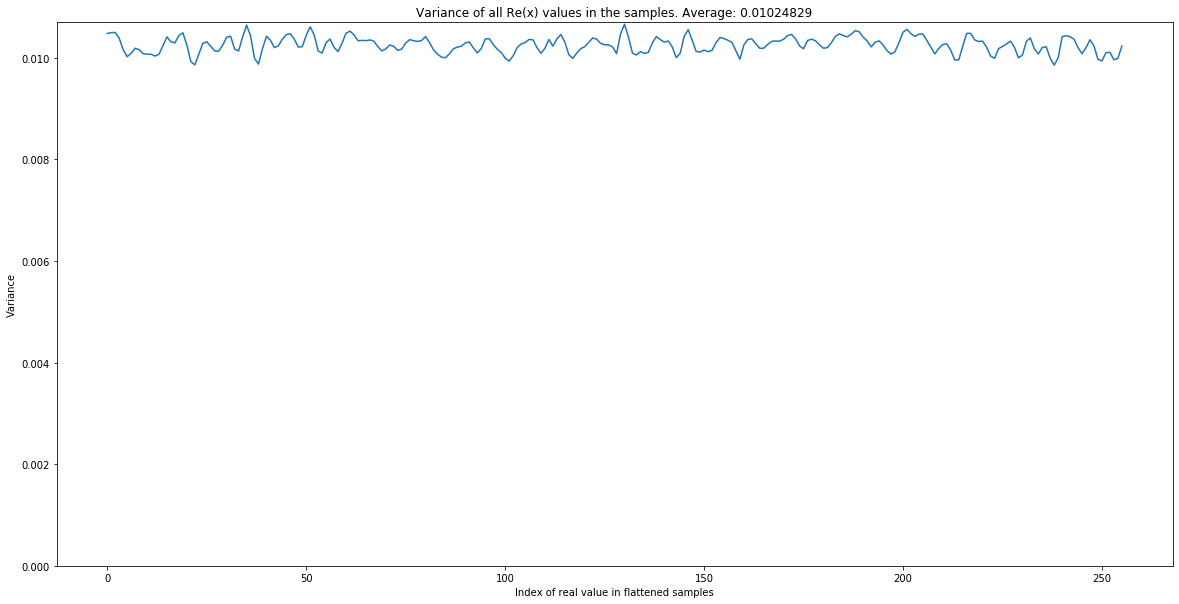

In [18]:
print("sigma: "+str(round(np.sqrt(np.mean(rvariances)),8)))
plt.figure(figsize=(20, 10))
plt.plot(rvariances)
plt.ylim(ymin=0)
plt.xlabel("Index of real value in flattened samples")
plt.ylabel("Variance")
_ = plt.title("Variance of all Re(x) values in the samples. Average: "+str(round(np.mean(rvariances),8)))
    

sigma: 0.0


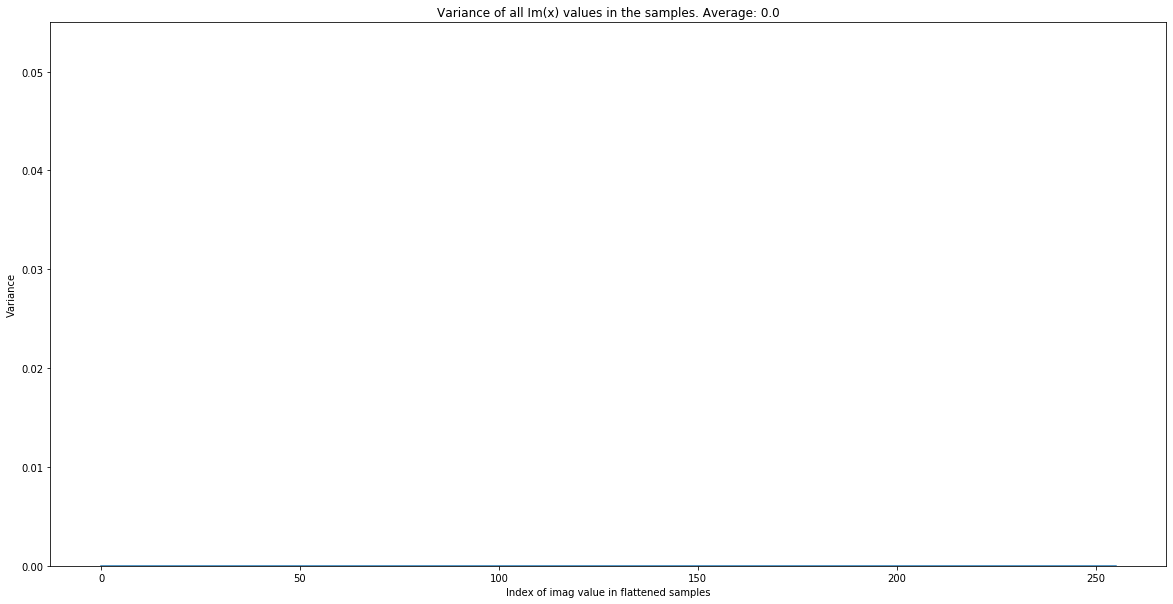

In [19]:
print("sigma: "+str(round(np.sqrt(np.mean(ivariances)),8)))
plt.figure(figsize=(20, 10))
plt.plot(ivariances)
plt.ylim(ymin=0)
plt.xlabel("Index of imag value in flattened samples")
plt.ylabel("Variance")
_ = plt.title("Variance of all Im(x) values in the samples. Average: "+str(round(np.mean(ivariances),8)))
    

## Smoothing gains

832 modes selected out of 114688 (1.0%) (zero-valued modes are also ignored)
1.000519306879881
2.4965352843485807e-17
1.000519306879881


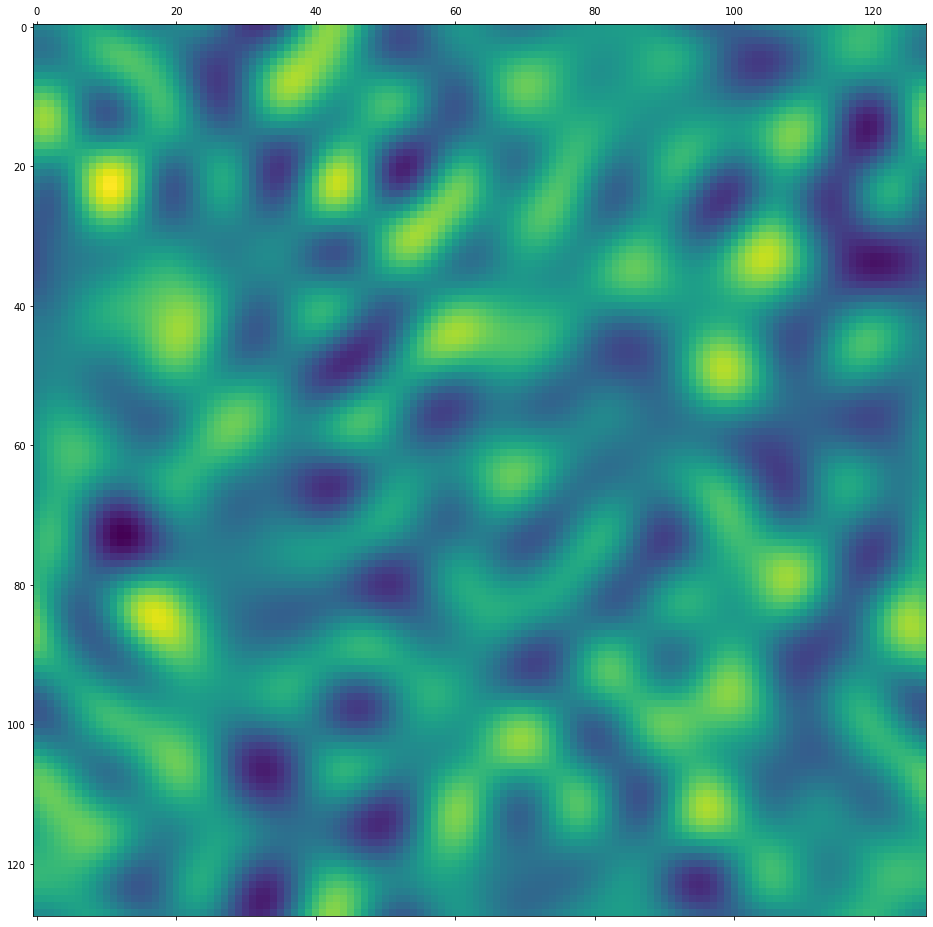

In [24]:
plt.rcParams['figure.figsize'] = [20, 20]
sm = SManager(128, 128, 4)

flat = lambda x, y: 1
gauss = lambda x, y: np.exp(-0.5*(x**2+y**2)/.005)
_, mask, _ = sm.generate_S(gauss, modes=8, zoom_from=(64, 64), view=True)

box = sm.box
mask[box[0]:box[1], box[2]:box[3]] = 1

# Adding the both ways DC makes it blocky. The mask should be a rectangle around the center.
# Also preserves the mean of the data.
#mask[64, :] = 1
#mask[:, 64] = 1
data = np.random.normal(size=mask.shape)+1
print(np.mean(data))
fft = np.fft.fft2(data)

"""
cut = 60

fft = np.fft.fftshift(fft)
fft[:cut, :] = 0
fft[-cut:, :] = 0
fft[:, :cut] = 0
fft[:, -cut:] = 0
"""

fft = np.fft.fftshift(fft)*mask

fft = np.fft.ifftshift(fft)
data = np.fft.ifft2(fft)
print(np.std(data.imag))
print(np.mean(data.real))
plt.matshow(data.real)
